# DSCI 441 Milestone 1
## By: Eddie McGowan

### Background/Proposal
For my project, I’m developing a classification model to predict the type of diabetes or prediabetic condition a person may have, based on a combination of genetic markers and environmental factors. I’ll be using a dataset from Kaggle, which includes a target column and 33 feature columns.

To build this model, I will test several machine learning algorithms, including:

Logistic Regression

Decision Tree
K-Nearest Neighbors (KNN)

Random Forest

XGBoost

Support Vector Machine (SVM)

Using these methods, I aim to create an accurate model to predict the condition a person is likely to have based on their unique features.

Link:

The dataset I chose has 34 columns and 70,000 rows. The columns are as follows: 
| Column Name                      | Description                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| **Target**                       | The type of diabetes or prediabetic condition diagnosed in the patient |
| **Genetic Markers**               | Indicates whether specific genetic markers associated with diabetes are present ("Positive" or "Negative"). |
| **Autoantibodies**                | Presence of autoantibodies associated with autoimmune diabetes ("Positive" or "Negative"). |
| **Family History**                | Indicates whether the patient has a family history of diabetes ("True" or "False"). |
| **Environmental Factors**         | Notes environmental influences that may contribute to diabetes ("Present" or "Absent"). |
| **Insulin Levels**                | Insulin levels in the patient’s blood (µU/mL).|
| **Age**                           | Age of the patient at the time of data collection (years).|
| **BMI**                           | Body Mass Index of the patient. |
| **Physical Activity**             | The patient’s level of physical activity ("High", "Moderate", "Low"). |
| **Dietary Habits**                | The patient’s eating habits ("Healthy" or "Unhealthy"). |
| **Blood Pressure**                | Blood pressure levels (mmHg).|
| **Cholesterol Levels**            | Cholesterol levels (mg/dL).|
| **Waist Circumference**           | Waist circumference measurement (cm).|
| **Blood Glucose Levels**          | Blood glucose levels (mg/dL).|
| **Ethnicity**                     | Classification of diabetes risk based on ethnicity ("Low Risk" or "High Risk"). |
| **Socioeconomic Factors**         | Socioeconomic status classification ("Medium", "High", "Low"). |
| **Smoking Status**                | Whether the patient is a smoker ("Smoker" or "Non-Smoker"). |
| **Alcohol Consumption**           | Alcohol consumption levels ("Low", "Moderate", "High"). |
| **Glucose Tolerance Test**        | Result of glucose tolerance test ("Normal" or "Abnormal"). |
| **History of PCOS**               | Whether the patient has a history of Polycystic Ovary Syndrome (PCOS) ("True" or "False"). |
| **Previous Gestational Diabetes** | Whether the patient had gestational diabetes ("True" or "False"). |
| **Pregnancy History**             | Pregnancy outcome classification ("Normal" or "Complications"). |
| **Weight Gain During Pregnancy**  | Weight gained during pregnancy (kg).|
| **Pancreatic Health**             | Pancreatic function assessment. |
| **Pulmonary Function**            | Pulmonary function test results.|
| **Cystic Fibrosis Diagnosis**     | Whether the patient has cystic fibrosis ("True" or "False"). |
| **Steroid Use History**           | Whether the patient has a history of steroid use ("True" or "False"). |
| **Genetic Testing**               | Results of genetic testing ("Positive" or "Negative"). |
| **Neurological Assessments**      | Neurological test results. |
| **Liver Function Tests**          | Results of liver function tests ("Normal" or "Abnormal"). |
| **Digestive Enzyme Levels**       | Levels of digestive enzymes in the body.|
| **Urine Test**                    | Urine test results ("Protein Present", "Normal", "Other"). |
| **Birth Weight**                  | The birth weight of the patient (grams). |
| **Early Onset Symptoms**          | Whether the patient exhibited early onset symptoms of diabetes ("True" or "False"). |


### EDA Steps

#### 1. Data Wrangling
    Load dataset and remove unnecessary attributes
    Remove duplicates
    Analyze schema and change data types
#### 2. Summary Statistics for Numerical Attributes
    Remove outliers from dataset
#### 3. Summary Statistics for Non-numeric Attributes
#### 4. One Hot Encode Non-numeric Attributes
#### 5. Comparing Attributes Against Price
    Plot attributes against price
    Compare attributes vs. price
    Find the attributes most correlated with price

## 1. Data Wrangling
###  Load dataset and remove unnecessary attributes

I loaded the file into a pandas dataframe and printed example rows.

In [60]:
import pandas as pd
diabetes_raw = pd.read_csv('diabetes_dataset.csv')
#Print the number of records: 70,000
print("rows:",len(diabetes_raw))
#Print example records
print(diabetes_raw.head())

rows: 70000
                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healt

### Remove Duplicates
Check for duplicated rows in the dataset. Remove one copy of any duplicated rows found. 

In [61]:
duplicated_rows = diabetes_raw[diabetes_raw.duplicated()]
print(duplicated_rows)
# no duplicated records were found

Empty DataFrame
Columns: [Target, Genetic Markers, Autoantibodies, Family History, Environmental Factors, Insulin Levels, Age, BMI, Physical Activity, Dietary Habits, Blood Pressure, Cholesterol Levels, Waist Circumference, Blood Glucose Levels, Ethnicity, Socioeconomic Factors, Smoking Status, Alcohol Consumption, Glucose Tolerance Test, History of PCOS, Previous Gestational Diabetes, Pregnancy History, Weight Gain During Pregnancy, Pancreatic Health, Pulmonary Function, Cystic Fibrosis Diagnosis, Steroid Use History, Genetic Testing, Neurological Assessments, Liver Function Tests, Digestive Enzyme Levels, Urine Test, Birth Weight, Early Onset Symptoms]
Index: []

[0 rows x 34 columns]


### Analyze schema and change data types
Print the schema of the dataframe.

In [62]:
#diabetes_raw.info()
diabetes_raw.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Physical Activity              70000 non-null  object
 6   Dietary Habits                 70000 non-null  object
 7   Ethnicity                      70000 non-null  object
 8   Socioeconomic Factors          70000 non-null  object
 9   Smoking Status                 70000 non-null  object
 10  Alcohol Consumption            70000 non-null  object
 11  Glucose Tolerance Test         70000 non-null  object
 12  History of PCOS                70000 non-null  object
 13  P

There are no null values in the dataset.

Boolean and categorical columns were incorrectly categorized as objects. In next cell these columns were converted to their proper data type.

In [63]:
categorical_columns = [
    "Target", "Genetic Markers", "Autoantibodies", 
    "Environmental Factors", "Physical Activity", "Dietary Habits",
    "Ethnicity", "Socioeconomic Factors", "Smoking Status",
    "Alcohol Consumption", "Glucose Tolerance Test", "Pregnancy History", "Genetic Testing","Liver Function Tests",
    "Urine Test"
]
diabetes = diabetes_raw
diabetes[categorical_columns] = diabetes_raw[categorical_columns].astype("category")
# map true and false to convert to boolean https://stackoverflow.com/questions/45196626/how-to-map-true-and-false-to-yes-and-no-in-a-pandas-data-frame-for-columns-o

diabetes["Family History"] = diabetes_raw["Family History"].map({"Yes": True, "No": False})

diabetes["History of PCOS"] = diabetes_raw["History of PCOS"].map({"Yes": True, "No": False})
diabetes["Previous Gestational Diabetes"] = diabetes_raw["Previous Gestational Diabetes"].map({"Yes": True, "No": False})
diabetes["Cystic Fibrosis Diagnosis"] = diabetes_raw["Cystic Fibrosis Diagnosis"].map({"Yes": True, "No": False})
diabetes["Steroid Use History"] = diabetes_raw["Steroid Use History"].map({"Yes": True, "No": False})
diabetes["Early Onset Symptoms"] = diabetes_raw["Early Onset Symptoms"].map({"Yes": True, "No": False})
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Target                         70000 non-null  category
 1   Genetic Markers                70000 non-null  category
 2   Autoantibodies                 70000 non-null  category
 3   Family History                 70000 non-null  bool    
 4   Environmental Factors          70000 non-null  category
 5   Insulin Levels                 70000 non-null  int64   
 6   Age                            70000 non-null  int64   
 7   BMI                            70000 non-null  int64   
 8   Physical Activity              70000 non-null  category
 9   Dietary Habits                 70000 non-null  category
 10  Blood Pressure                 70000 non-null  int64   
 11  Cholesterol Levels             70000 non-null  int64   
 12  Waist Circumference            7

## 2. Summary statistics: Numeric Attributes
Describe the high level statistics for each of the numeric columns.

In [64]:
diabetes.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


## 4. Summary statistics: Non-Numeric Attributes
I will now describe the high level statistics for each of the non-numeric columns

In [65]:
diabetes.describe(include='category').transpose()

,count,unique,top,freq
Target,70000,13,MODY,5553
Genetic Markers,70000,2,Positive,35101
Autoantibodies,70000,2,Negative,35058
Environmental Factors,70000,2,Absent,35088
Physical Activity,70000,3,Moderate,23427
Dietary Habits,70000,2,Healthy,35020
Ethnicity,70000,2,Low Risk,35018
Socioeconomic Factors,70000,3,Medium,23413
Smoking Status,70000,2,Smoker,35045
Alcohol Consumption,70000,3,Low,23411


In [66]:
#Print the unique values
#Resource https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe
for col in categorical_columns:
    print(f"Unique values for {col}:")
    print(",".join(map(str, diabetes[col].unique())))
    print("-" * 50)

Unique values for Target:
Steroid-Induced Diabetes,Neonatal Diabetes Mellitus (NDM),Prediabetic,Type 1 Diabetes,Wolfram Syndrome,LADA,Type 2 Diabetes,Wolcott-Rallison Syndrome,Secondary Diabetes,Type 3c Diabetes (Pancreatogenic Diabetes),Gestational Diabetes,Cystic Fibrosis-Related Diabetes (CFRD),MODY
--------------------------------------------------
Unique values for Genetic Markers:
Positive,Negative
--------------------------------------------------
Unique values for Autoantibodies:
Negative,Positive
--------------------------------------------------
Unique values for Environmental Factors:
Present,Absent
--------------------------------------------------
Unique values for Physical Activity:
High,Low,Moderate
--------------------------------------------------
Unique values for Dietary Habits:
Healthy,Unhealthy
--------------------------------------------------
Unique values for Ethnicity:
Low Risk,High Risk
--------------------------------------------------
Unique values for Socio

In [70]:
diabetes["Genetic Markers Positive"] = (
    diabetes_raw["Genetic Markers"]
    .map({"Positive": True, "Negative": False})
    .fillna(False).astype(bool)
)
diabetes.drop(columns=["Genetic Markers"], inplace=True)

diabetes["Autoantibodies Positive"] = (
    diabetes_raw["Autoantibodies"].map({"Positive": True, "Negative": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Autoantibodies"], inplace=True)

diabetes["Environmental Factors Present"] = (
    diabetes_raw["Environmental Factors"].map({"Present": True, "Absent": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Environmental Factors"], inplace=True)

diabetes["Dietary Habits Unhealthy"] = (
    diabetes_raw["Dietary Habits"].map({"Unhealthy": True, "Healthy": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Dietary Habits"], inplace=True)

diabetes["Smoking Status Smoker"] = (
    diabetes_raw["Smoking Status"].map({"Smoker": True, "Non-Smoker": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Smoking Status"], inplace=True)

diabetes["Glucose Tolerance Test Abnormal"] = (
    diabetes_raw["Glucose Tolerance Test"].map({"Abnormal": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Glucose Tolerance Test"], inplace=True)

diabetes["Pregnancy History Complications"] = (
    diabetes_raw["Pregnancy History"].map({"Complications": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Pregnancy History"], inplace=True)

diabetes["Genetic Testing Positive"] = (
    diabetes_raw["Genetic Testing"].map({"Positive": True, "Negative": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Genetic Testing"], inplace=True)

diabetes["Liver Function Tests Abnormal"] = (
    diabetes_raw["Liver Function Tests"].map({"Abnormal": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Liver Function Tests"], inplace=True)

print(diabetes.dtypes)


Target                             category
Family History                         bool
Insulin Levels                        int64
Age                                   int64
BMI                                   int64
Physical Activity                  category
Blood Pressure                        int64
Cholesterol Levels                    int64
Waist Circumference                   int64
Blood Glucose Levels                  int64
Ethnicity                          category
Socioeconomic Factors              category
Alcohol Consumption                category
History of PCOS                        bool
Previous Gestational Diabetes          bool
Weight Gain During Pregnancy          int64
Pancreatic Health                     int64
Pulmonary Function                    int64
Cystic Fibrosis Diagnosis              bool
Steroid Use History                    bool
Neurological Assessments              int64
Digestive Enzyme Levels               int64
Urine Test                      

## 4. One Hot Encoding Categorical Attributes
I will now describe the high level statistics for each of the non-numeric columns

In [85]:
categorical_columns = ["Physical Activity", "Ethnicity", "Socioeconomic Factors", 
                       "Alcohol Consumption", "Urine Test"
]

# Perform one-hot encoding while dropping the first category to avoid multicollinearity
#Resource: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
diabetes_encoded = pd.get_dummies(diabetes, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(diabetes_encoded.head())

print(f"Number of features: {diabetes_encoded.shape[1]}")
diabetes_encoded.columns.tolist()

                             Target  Family History  Insulin Levels  Age  BMI  \
0          Steroid-Induced Diabetes           False              40   44   38   
1  Neonatal Diabetes Mellitus (NDM)           False              13    1   17   
2                       Prediabetic            True              27   36   24   
3                   Type 1 Diabetes           False               8    7   16   
4                  Wolfram Syndrome            True              17   10   17   

   Blood Pressure  Cholesterol Levels  Waist Circumference  \
0             124                 201                   50   
1              73                 121                   24   
2             121                 185                   36   
3             100                 151                   29   
4             103                 146                   33   

   Blood Glucose Levels  History of PCOS  ...  Socioeconomic Factors_High  \
0                   168            False  ...                  

['Target',
 'Family History',
 'Insulin Levels',
 'Age',
 'BMI',
 'Blood Pressure',
 'Cholesterol Levels',
 'Waist Circumference',
 'Blood Glucose Levels',
 'History of PCOS',
 'Previous Gestational Diabetes',
 'Weight Gain During Pregnancy',
 'Pancreatic Health',
 'Pulmonary Function',
 'Cystic Fibrosis Diagnosis',
 'Steroid Use History',
 'Neurological Assessments',
 'Digestive Enzyme Levels',
 'Birth Weight',
 'Early Onset Symptoms',
 'Genetic Markers Positive',
 'Autoantibodies Positive',
 'Environmental Factors Present',
 'Dietary Habits Unhealthy',
 'Smoking Status Smoker',
 'Glucose Tolerance Test Abnormal',
 'Pregnancy History Complications',
 'Genetic Testing Positive',
 'Liver Function Tests Abnormal',
 'Physical Activity_High',
 'Physical Activity_Low',
 'Physical Activity_Moderate',
 'Ethnicity_High Risk',
 'Ethnicity_Low Risk',
 'Socioeconomic Factors_High',
 'Socioeconomic Factors_Low',
 'Socioeconomic Factors_Medium',
 'Alcohol Consumption_High',
 'Alcohol Consumption_Lo

### Method 1: Decision Tree

Decision Tree Accuracy: 0.56
Tree depth: 5
Number of nodes: 23


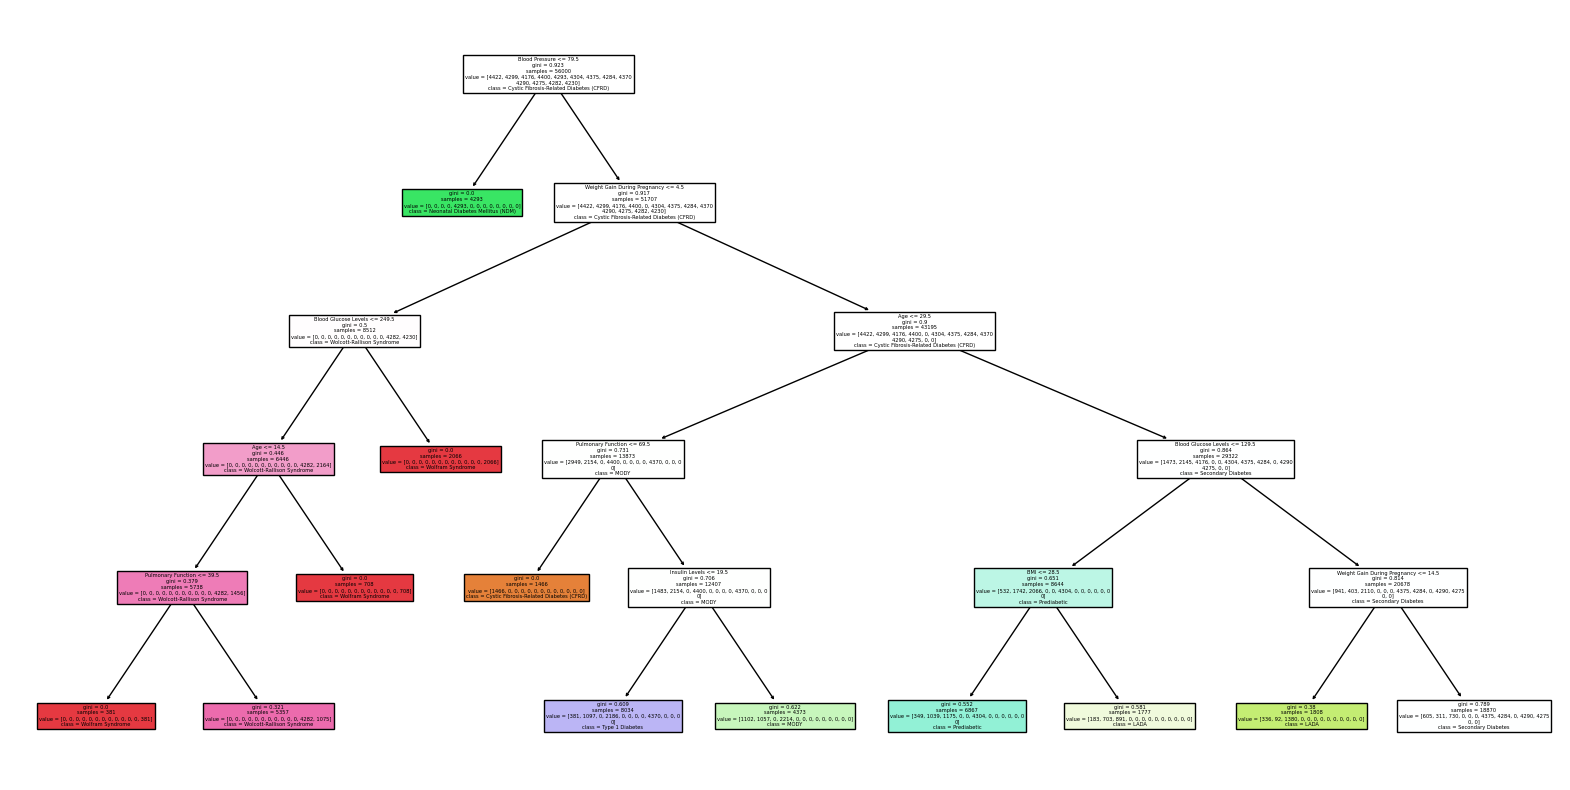

In [27]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Select features and target
X = diabetes.drop(columns=["Target"])  # All features except target
y = diabetes["Target"]  # Target variable (multi-class)

# Convert categorical and boolean columns to numeric
for col in X.select_dtypes(include=["object", "bool"]).columns:
    X[col] = X[col].astype("category")
    
for col in X.select_dtypes(include=["category"]).columns:
    X[col] = X[col].cat.codes  # Convert categorical to numerical codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

# Train Decision Tree
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=95)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Check tree depth and nodes to ensure it's not empty
print(f"Tree depth: {tree_model.get_depth()}")
print(f"Number of nodes: {tree_model.tree_.node_count}")

feature_names = X.columns.tolist()

# Fix: Convert class names to string list
class_names = [str(cls) for cls in tree_model.classes_]

# Fix: Use explicit subplot to avoid rendering issues
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, class_names=class_names, filled=True, ax=ax)


Random Forest Accuracy: 0.81


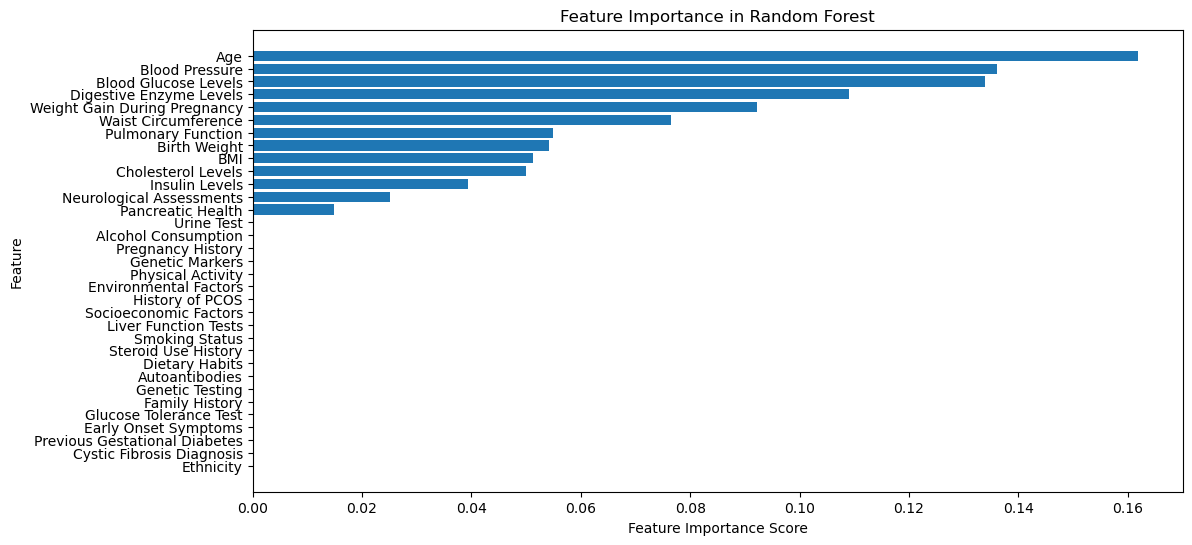

In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5, random_state=95)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

import numpy as np

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, feature_importance[sorted_indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()



Since there are 33 input columns, I will perform dimensionality reduction before proceeding with further EDA to simplify the problem.

/var/folders/lk/yczlh7fd1fj3p25xqwmtk1ph0000gn/T/ipykernel_5445/322727172.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetes_encoded.corr().abs()


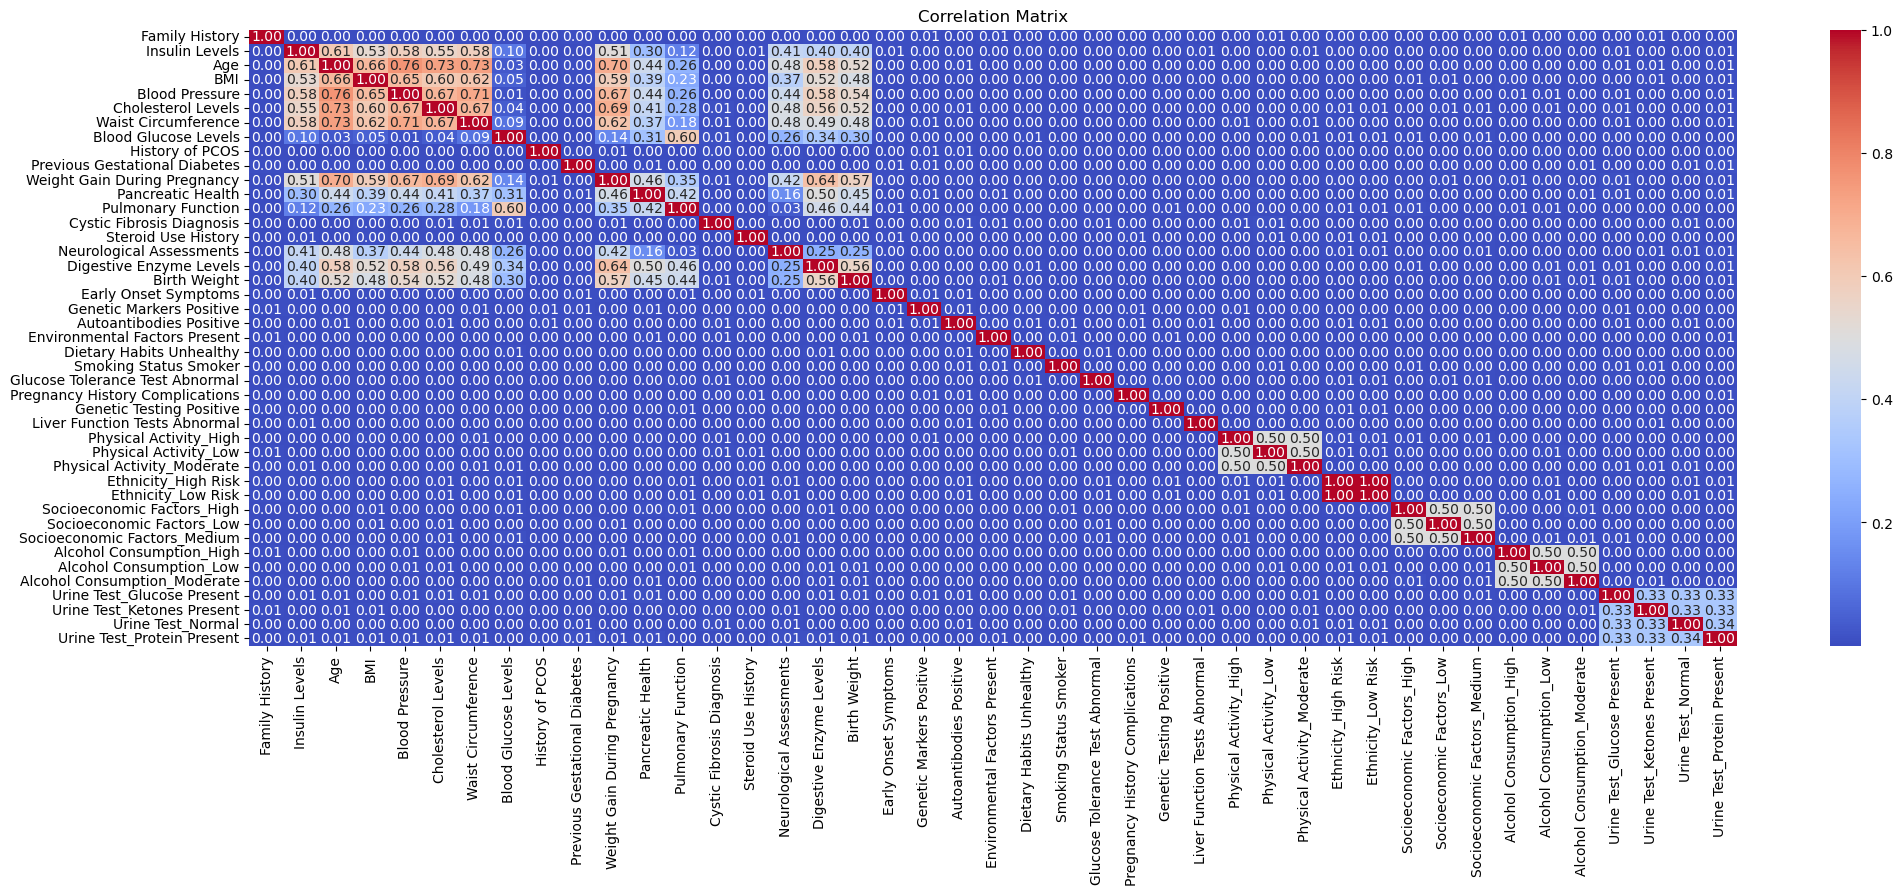

In [84]:
#Check for multicollinearity in car type
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = diabetes_encoded.corr().abs()

# Visualize with a heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical features for PCA
numerical_cols = diabetes.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
pca_transformed = pca.fit_transform(scaled_data)

# Check how many components are needed
print(f"Number of components: {pca.n_components_}")

# Convert back to DataFrame
pca_df = pd.DataFrame(pca_transformed)

In [ ]:
Engine Volume cannot be converted into a numeric type because some values contain the word 'Turbo.' I am creating a new column called 'Turbo,' which will contain 'Yes' if 'Turbo' is present, and 'No' if it is not.

After that, the word 'Turbo' will be removed from the 'Engine Volume' column, and the column will be converted to a float64 data type.

In [6]:
#Create Turbo column.
car['Turbo'] = car['Engine volume'].str.contains('Turbo')
car['Turbo'] = car['Turbo'].replace('True', 'Yes')
car['Turbo'] = car['Turbo'].replace('False', 'No')
#Remove Turbo from the engine volume column.
car['Engine volume'] = car['Engine volume'].str.replace(' Turbo', '')
car['Engine volume'] = car['Engine volume'].astype('float64')

The 'Mileage' column contains values with the units ' km' at the end. These units will be removed, and the column will then be cast to the int64 data type.

In [7]:
#Remove km
car['Mileage'] = car['Mileage'].str.replace(' km', '')
#Convert to int64
car['Mileage'] = car['Mileage'].astype('int64')

The 'Cylinders' column was imported as float64, but all the values were integers, so I converted it to int64.

In [8]:
car['Cylinders'] = car['Cylinders'].astype('int64')

In the Doors column, the 2 door value and the 4 door value was interpreted as a data. These values were replaced with integer values. The column is converted to a category (ordinal) data type with the order "2"<"4"< ">5". 

In [9]:
#Replace date values with the corresponding number
car['Doors'] = car['Doors'].str.replace('04-May', '4')
car['Doors'] = car['Doors'].str.replace('02-Mar', '2')
#Convert to category data type
door_order = pd.CategoricalDtype(categories=['2', '4', '>5'], ordered=True)
car['Doors'] = car['Doors'].astype(door_order)
#Print values and data type
print(car['Doors'].unique())
print(car['Doors'].dtype)

['4', '2', '>5']
Categories (3, object): ['2' < '4' < '>5']
category


Print example records and the final schema.

In [10]:
print(car.head())
print(car.info())

         ID  Price  Prod. year   Category Leather interior Fuel type  \
0  45654403  13328        2010       Jeep              Yes    Hybrid   
1  44731507  16621        2011       Jeep               No    Petrol   
2  45774419   8467        2006  Hatchback               No    Petrol   
3  45769185   3607        2011       Jeep              Yes    Hybrid   
4  45809263  11726        2014  Hatchback              Yes    Petrol   

   Engine volume  Mileage  Cylinders Gear box type Drive wheels Doors  \
0            3.5   186005          6     Automatic          4x4     4   
1            3.0   192000          6     Tiptronic          4x4     4   
2            1.3   200000          4      Variator        Front     4   
3            2.5   168966          4     Automatic          4x4     4   
4            1.3    91901          4     Automatic        Front     4   

              Wheel   Color  Airbags  Turbo  
0        Left wheel  Silver       12  False  
1        Left wheel   Black        8

## 2. Feature Engineering
In general, the newer the car, the higher its price. To show how many years old a car is, I am calculating the difference between the maximum model year in the dataset and the production year. This value is stored in a new column called 'Prod. old,' which represents the car's age in years. This approach helps the model generalize based on the car's age.

In [11]:
#Create Prod. old column
car['Prod. old'] = max(car['Prod. year']) - car['Prod. year']
car.head()

,ID,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Prod. old
0,45654403,13328,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12,False,10
1,44731507,16621,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,False,9
2,45774419,8467,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2,False,14
3,45769185,3607,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0,False,9
4,45809263,11726,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4,False,6


## 3. Summary statistics: Numeric Attributes
Describe the high level statistics for each of the numeric columns.

In [12]:
car.describe()

,ID,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Prod. old
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,2.306251,1.555373e+06,4.580216,6.568379,9.085764
std,9.375468e+05,1.921356e+05,5.665749,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,2.074688e+07,1.000000e+00,1939.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,1.800000,7.019575e+04,4.000000,4.000000,5.000000
50%,4.577191e+07,1.317200e+04,2012.000000,2.000000,1.264000e+05,4.000000,6.000000,8.000000
75%,4.580174e+07,2.206300e+04,2015.000000,2.500000,1.891198e+05,4.000000,12.000000,11.000000
max,4.581665e+07,2.630750e+07,2020.000000,20.000000,2.147484e+09,16.000000,16.000000,81.000000


### Remove outliers from dataset
The ID column is included in EDA but will be excluded during model development. Below, I review each column to determine the validity of the values. I will remove records with erroneous values, as the presence of errors in these records may indicate that other factors could also be inaccurate.

The price column shows a large variance, ranging from 1 to 26.3 million. I believe there are outliers in this column. On the low end, the cheapest working used cars typically cost around two thousand dollars. This suggests that cars priced below this value may either have significant issues or the data was mistyped. In either case, these records are not useful for determining the price of functional cars. For this reason, I removed all records with a price less than two thousand dollars.

In [13]:
car = car[car['Price'] > 2000]

On the high end of price, the data could represent supercars or be the result of a data entry error. Below, I will further investigate the data to identify the cause of these extreme values. First, I checked the records with a price greater than one million dollars.

In [14]:
print(car_raw[car_raw['Price'] > 1000000])

             ID     Price Levy Manufacturer  Model  Prod. year     Category  \
16983  45812886  26307500    -         OPEL  Combo        1999  Goods wagon   

      Leather interior Fuel type Engine volume   Mileage  Cylinders  \
16983               No    Diesel           1.7  99999 km        4.0   

      Gear box type Drive wheels   Doors       Wheel Color  Airbags  
16983        Manual        Front  02-Mar  Left wheel  Blue        0  


There is only one record with a price greater than one million dollars. After researching this car, it appears to be a standard vehicle, and I could not find any information to justify such a high price. For this reason, I have removed this data point.

In [15]:
car = car[car['Price'] < 1000000]

<u>Viewing and Cleaning Price data</u>

First, I created a boxplot of price to see the data distribution.

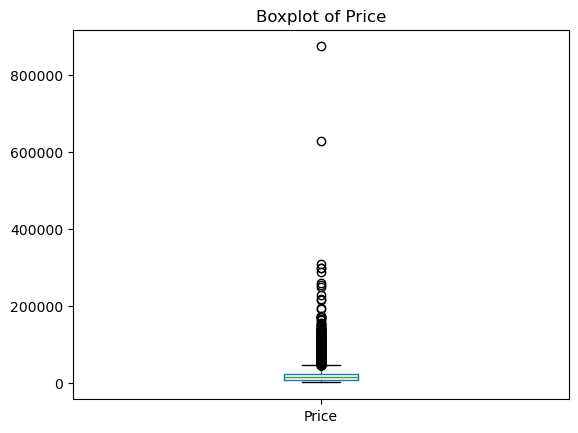

In [16]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Price', grid=False)
plt.title('Boxplot of Price') 
plt.show()

The data appears to have a long tail with a few data points above 200,000 dollars. Cars with this value are rare. I pulled the records for all the cars with a price greater than 200,000 dollars to see if they were luxury cars.

In [17]:
print(car_raw[(car_raw['Price'] > 200000) & (car_raw['Price'] < 1000000)])

             ID   Price  Levy   Manufacturer                    Model  \
1225   45795524  627220     -  MERCEDES-BENZ           G 65 AMG 63AMG   
2283   45786808  219527     -        BENTLEY           Continental GT   
5008   45810285  308906  1694        PORSCHE                      911   
5840   44991441  254024  1292  MERCEDES-BENZ            GLE 400 A M G   
7283   45420737  228935     -  MERCEDES-BENZ               GLE 63 AMG   
7353   43683199  216391     -  MERCEDES-BENZ         G 65 AMG G63 AMG   
7749   45760644  288521  2269            BMW  M5 Машина в максимально   
8541   45761204  872946  2067    LAMBORGHINI                     Urus   
9367   45229113  297930     -  MERCEDES-BENZ                 AMG GT S   
10759  45291161  260296     -          LEXUS                   LX 570   
14839  45792307  297930     -     LAND ROVER        Range Rover Vogue   
15283  45069516  250574  1481  MERCEDES-BENZ                  GLE 400   

       Prod. year   Category Leather interior Fuel

These outliers were luxury cars, so they were valid to keep in the dataset. To visualize the data differently, I created a histogram.

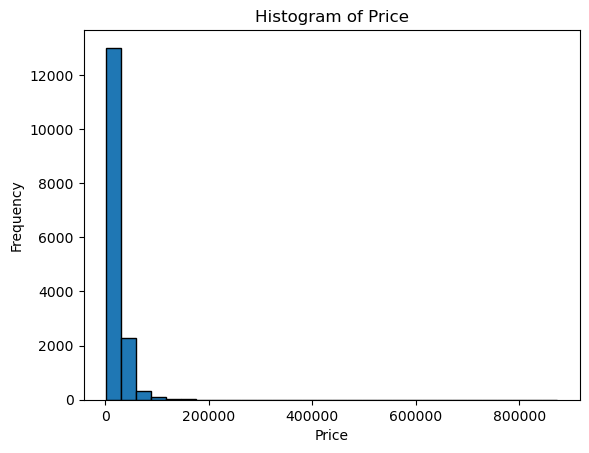

In [18]:
car['Price'].hist(bins=30, edgecolor='black', grid=False)  
plt.title('Histogram of Price') 
plt.ylabel('Frequency') 
plt.xlabel('Price')  
plt.show()

The plot was aligned with my expectations for price. It showed the majority of the cars were under the price of $50,000.

<u>Viewing and Cleaning Engine Volume Data</u>

In the summary statistics above, the maximum value for the engine volume column was 20L. It is rare for cars to have an engine size above 7L, thus it is highly likely these data points were errors. Thus, all data points with a greater than an 8L engine were removed. Once the outliers were removed, I created a box plot to see the data distribution.

In [19]:
car = car[car['Engine volume'] < 8]

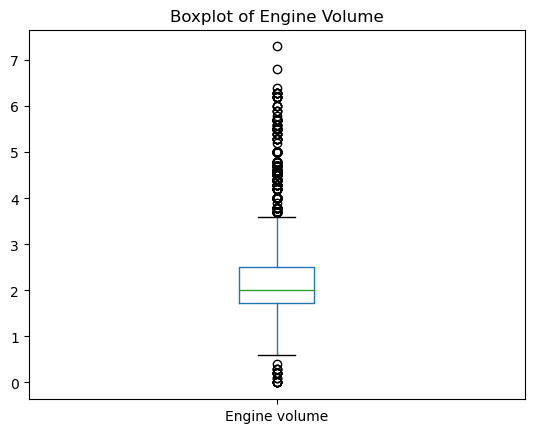

In [20]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Engine volume', grid=False)
plt.title('Boxplot of Engine Volume')
plt.show()

I viewed cars with engine volumes greater than 6L. The only cars that had engines this size were luxury cars or trucks.

In [21]:
car_filtered = car[car['Engine volume'] > 6]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
print(merged_data)

          ID  Price_x  Levy   Manufacturer           Model  Prod. year_x  \
0   45757249     9565  2410      CHEVROLET          Camaro          2010   
1   45795524   627220     -  MERCEDES-BENZ  G 65 AMG 63AMG          2020   
2   45773855    35752  3156            GMC           Yukon          2019   
3   45788165   109764     -  MERCEDES-BENZ        C 63 AMG          2011   
4   45808991    83251  2578      CHEVROLET          Camaro          2016   
5   45806412    19444  1807       CADILLAC        Escalade          2012   
6   45813777   175622  2819        BENTLEY        Mulsanne          2016   
7   45785703     7840  5877  MERCEDES-BENZ         CLK 430          2005   
8   45812939     5331     -            GAZ              24          1990   
9   45813297    31988  3015        FERRARI             F50          2017   
10  45813837    22266  2658          DODGE      Challenger          2016   
11  45688300    20385     -  MERCEDES-BENZ       ML 63 AMG          2006   
12  45754055

The records in the table represented luxury cars and trucks. Thus, this data was valid. 

Electric cars have a engine volume of 0. Besides electric cars, there are no popular cars with a engine volume less than 0.5L. Below I show the records with an engine size less than 0.5L.

In [22]:
car_filtered = car[(car['Engine volume'] > 0) & (car['Engine volume'] <= 0.5 )]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
print(merged_data)

          ID  Price_x Levy Manufacturer         Model  Prod. year_x  \
0   45811644     8154    -   MITSUBISHI       Airtrek          2002   
1   45788534     2500    -          VAZ          2106          1988   
2   45810217     2666  155   VOLKSWAGEN           GTI          2015   
3   45634917     3293  155   VOLKSWAGEN         Jetta          2015   
4   45812743     2509  167   VOLKSWAGEN           Eos          2016   
5   45793459     3000    -          VAZ          2107          1990   
6   45762833     4547  155   VOLKSWAGEN      Scirocco          2015   
7   45624822     8624  175       TOYOTA          Vitz          2011   
8   45760290     2666  115       NISSAN          Leaf          2013   
9   45775006   163077    -          BMW  M6 Gran cupe          2014   
10  45634914     3293  155   VOLKSWAGEN         Jetta          2015   
11  45757589     2117  155   VOLKSWAGEN           GTI          2015   
12  45770767     6272    -        MAZDA         Demio          2003   

   Ca

The records in the table represent standard cars, which have engine sizes greater than 0.5L. Thus, these records were errors and were removed. 

In [23]:
car = car[(car['Engine volume'] == 0) | (car['Engine volume'] > 0.5)]

To visualize the data differently, I created a histogram.

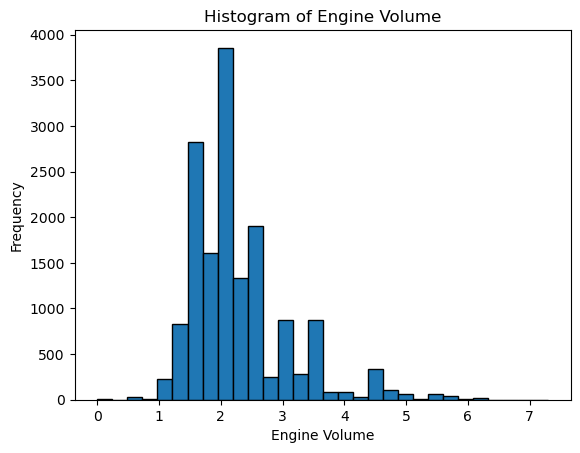

In [24]:
car['Engine volume'].hist(bins=30, edgecolor='black', grid=False) 
plt.title('Histogram of Engine Volume') 
plt.ylabel('Frequency') 
plt.xlabel('Engine Volume')  
plt.show()

This plot aligns with my expectations for engine volume. Most cars have around a 2L engine, with a few cars having smaller and larger engines.

<u>Viewing and Cleaning Mileage Data </u>

As seen in the summary statistics above, there is at least one record with a mileage of 2.1E9 km. This data point is an error, as cars rarely exceed a mileage of 300,000 km. This value is several orders of magnitude higher. To exclude such erroneous data points, I set a threshold of 400,000 km for mileage, as cars with greater mileage are unlikely to have significant market value

In [25]:
car = car[car['Mileage'] < 400000]

I created a box plot of price to see the data distribution.

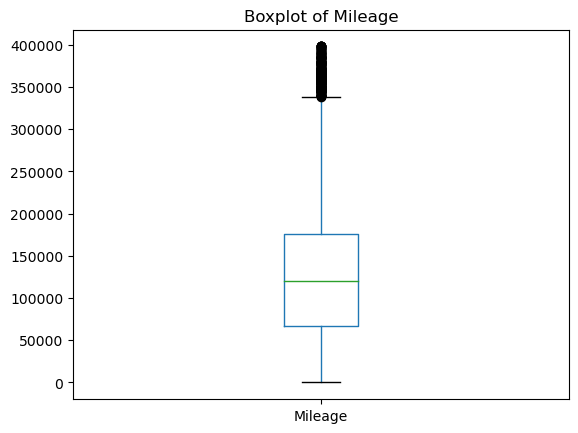

In [26]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Mileage', grid=False)
plt.title('Boxplot of Mileage') 
plt.show()

This box plot aligns with my expectations. There was a significant number of new cars, as indicated by the first quartile being near 0. However, most of the cars were used, with mileage ranging between approximately 60,000 km and 170,000 km. However, there are also some used cars with high mileage. 

To visualize the data differently, I created a histogram.

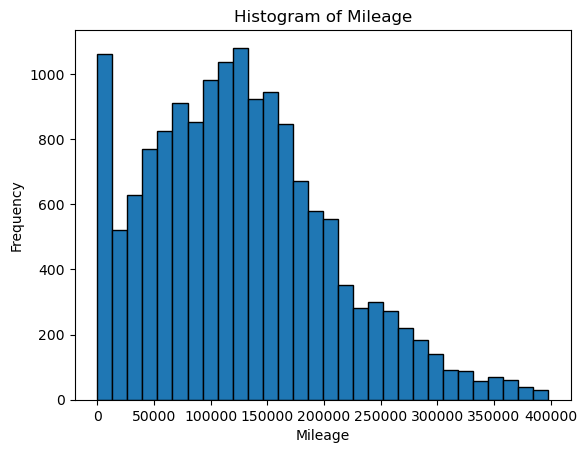

In [27]:
car['Mileage'].hist(bins=30, edgecolor='black', grid=False) 
plt.title('Histogram of Mileage') 
plt.ylabel('Frequency') 
plt.xlabel('Mileage')  
plt.show()

This plot aligns with my expectations for mileage. There is an initial peak around 0, representing new cars, followed by a second peak around 120,000 km, which represents used cars.

<u>Viewing and Cleaning Cylinders Data</u>

As seen in the summary statistics above, there is at least one record with 16 cylinders. It is rare for cars to have an engine size above 12 cylinders, although it may be valid if the car is a supercar. I checked these records to see if these cars were supercars.

In [28]:
car_filtered = car[car['Cylinders'] > 12]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
merged_data


,ID,Price_x,Levy,Manufacturer,Model,Prod. year_x,Category_x,Leather interior_x,Fuel type_x,Engine volume_x,...,Mileage_y,Cylinders_y,Gear box type_y,Drive wheels_y,Doors_y,Wheel_y,Color_y,Airbags_y,Turbo,Prod. old
0,45773579,11604,993,OPEL,Astra,2006,Goods wagon,No,Diesel,1.3 Turbo,...,27000,16,Manual,Front,4,Left wheel,Black,8,True,14
1,45768286,7000,-,HONDA,Fit Aria,2003,Hatchback,No,Petrol,1.5 Turbo,...,140203,16,Automatic,Front,4,Right-hand drive,Silver,2,True,17
2,45802046,21953,-,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,...,69000,16,Automatic,Front,4,Left wheel,Silver,16,False,4
3,45797531,15681,966,CHEVROLET,Lacetti,2009,Sedan,Yes,Diesel,2,...,6500,14,Automatic,Front,4,Left wheel,White,8,False,11
4,45770557,39829,-,BMW,X6,2009,Jeep,Yes,Petrol,3.5 Turbo,...,152000,16,Tiptronic,4x4,4,Left wheel,Grey,16,True,11
5,45772894,7213,-,OPEL,Combo,2001,Goods wagon,No,Diesel,1.7 Turbo,...,242701,16,Manual,Front,2,Left wheel,Blue,2,True,19


None of these cars were supercars. Thus, the cylinder information for these records were incorrect, and I removed these records

In [29]:
car = car[car['Cylinders'] < 12]

I next created a box plot to see the data distribution.

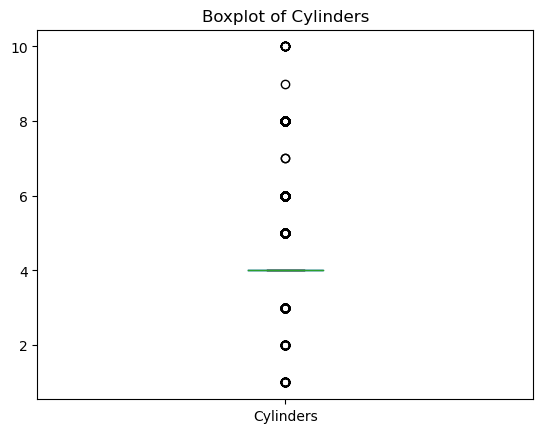

In [30]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Cylinders', grid=False)
plt.title('Boxplot of Cylinders') 
plt.show()

Most cars are 4 cylinder cars, so this plot aligns with my expections. 

To visualize the data differently, I also created a histogram.

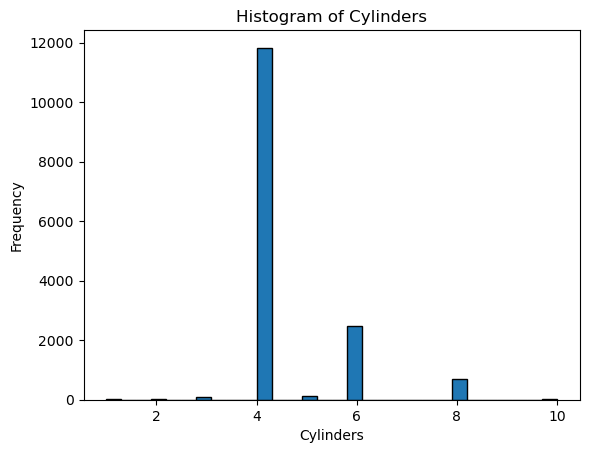

In [31]:
car['Cylinders'].hist(bins=30, edgecolor='black', grid=False) 
plt.title('Histogram of Cylinders') 
plt.ylabel('Frequency') 
plt.xlabel('Cylinders')  
plt.show()

This plot aligns with expectations for number of cylinders. Most cars have a four cylinder engine, but there are also many cars with 6 and 8 cylinder engines.

<u>Viewing and Cleaning Airbags Data</u>

As noted in the summary statistics above, there is at least one record with 16 airbags. It is rare for cars to have more than 14 airbags, making it likely that these data points were errors. I, therefore, checked these records to determine if the cars were unusual. If they are standard cars, the records would be removed.

In [32]:
car_filtered = car[car['Airbags'] >= 14]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
merged_data

,ID,Price_x,Levy,Manufacturer,Model,Prod. year_x,Category_x,Leather interior_x,Fuel type_x,Engine volume_x,...,Mileage_y,Cylinders_y,Gear box type_y,Drive wheels_y,Doors_y,Wheel_y,Color_y,Airbags_y,Turbo,Prod. old
0,45782067,12231,-,MITSUBISHI,Airtrek,2005,Jeep,No,LPG,2.4,...,144000,4,Tiptronic,4x4,4,Right-hand drive,White,16,False,15
1,44452971,36065,1399,TOYOTA,Sienna,2010,Minivan,Yes,Petrol,3.5,...,227200,6,Tiptronic,Front,4,Left wheel,White,16,False,10
2,45781861,15367,640,VOLKSWAGEN,Passat,2013,Sedan,Yes,Diesel,2.0 Turbo,...,179200,4,Tiptronic,Front,4,Left wheel,White,16,True,7
3,45801743,23521,-,TOYOTA,Corolla,2014,Sedan,No,Petrol,1.8,...,40000,4,Automatic,Front,4,Left wheel,Green,16,False,6
4,45495802,19444,831,MITSUBISHI,Outlander,2011,Jeep,No,Petrol,2.4,...,141000,4,Tiptronic,Front,4,Left wheel,Silver,16,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,45802358,24462,1211,HYUNDAI,Veracruz,2010,Jeep,Yes,Diesel,3.0 Turbo,...,45000,6,Automatic,Front,4,Left wheel,Black,14,True,10
109,45755930,6272,-,BMW,X5,2000,Jeep,Yes,Petrol,4.4,...,195634,8,Tiptronic,4x4,4,Left wheel,Grey,16,False,20
110,45786558,10036,494,MITSUBISHI,Mirage,2015,Hatchback,No,Petrol,1.2,...,80000,3,Tiptronic,Front,4,Left wheel,Blue,16,False,5
111,45786756,8154,-,BMW,328,2009,Coupe,Yes,Petrol,3,...,166000,6,Tiptronic,Rear,2,Left wheel,Silver,16,False,11


As all of these cars have a standard number of airbags, these data points are errors and will be removed.

In [33]:
car = car[car['Airbags'] < 14]

Airbags have been required since 1999, as outlined by the IIHS (link below).
Link:https://www.iihs.org/topics/airbags#:~:text=Front%20airbags%20have%20been%20required,meet%20federal%20side%20protection%20requirements. Therefore, all cars manufactured since 2000 should have at least 2 airbags. Since the dataset includes data through 2020, I examined the records for cars that are less than 20 years old and have fewer than 2 airbags. Any such records are errors, as these cars were federally mandated to have at least 2 airbags.

In [34]:
car_filtered = car[(car['Airbags'] <= 2) & (car['Prod. old'] < 20)]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
merged_data
car = car[~((car['Prod. old'] < 20) & (car['Airbags'] < 2))]

Once the outliers were removed, I created a box plot to see the data distribution.

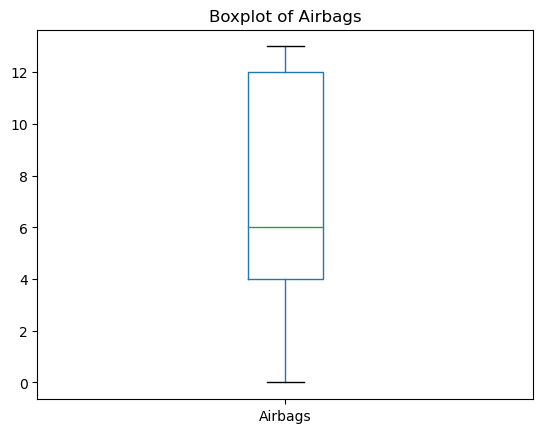

In [35]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Airbags', grid=False)
plt.title('Boxplot of Airbags') 
plt.show()

This plot aligns with my expectations as most cars have between 4 and 12 airbags.

To visualize the data differently, I created a histogram.

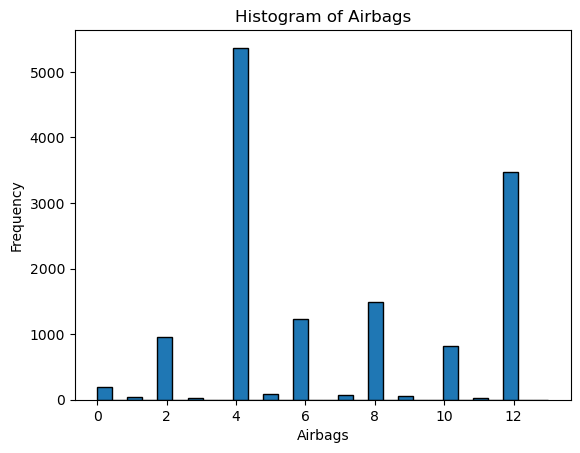

In [36]:
car['Airbags'].hist(bins=30, edgecolor='black', grid=False) 
plt.title('Histogram of Airbags') 
plt.ylabel('Frequency') 
plt.xlabel('Airbags')  
plt.show()

This plot aligns with expectations for number of airbags. Most cars have at an even number of airbags, which correspond to the number of seats in the car.

<u>Viewing and cleaning Production Year/Years Old Data</u>

As seen in the summary statistics above there is at least one record where the car is 81 years old. These cars exist, but are rare. I will view these cars, and see if they are valid. 

Production years old and production years are based on the same column. Thus, they will contain the same distribution and outliers. For this reason, I am only analyzing production years old.

In [37]:
car_filtered = car[car['Prod. old'] > 30]
merged_data = pd.merge(car_raw,car_filtered, on='ID', how='inner')
merged_data

,ID,Price_x,Levy,Manufacturer,Model,Prod. year_x,Category_x,Leather interior_x,Fuel type_x,Engine volume_x,...,Mileage_y,Cylinders_y,Gear box type_y,Drive wheels_y,Doors_y,Wheel_y,Color_y,Airbags_y,Turbo,Prod. old
0,45815832,4000,-,VAZ,1111,1988,Sedan,Yes,Petrol,1.3,...,1000,4,Manual,Rear,4,Left wheel,Green,6,False,32
1,45775203,15681,-,GAZ,32214,1977,Limousine,No,Petrol,2.4,...,11111,6,Manual,Rear,4,Left wheel,Black,0,False,43
2,45793446,3763,-,BMW,520,1989,Sedan,No,Petrol,2,...,199000,6,Manual,Rear,4,Left wheel,White,0,False,31
3,45294085,8467,-,MERCEDES-BENZ,E 200,1988,Sedan,No,Petrol,2,...,1000,4,Manual,Rear,4,Left wheel,Black,4,False,32
4,45810603,4704,-,VAZ,2106,1986,Sedan,No,CNG,1.3,...,1000,2,Manual,Front,4,Left wheel,Blue,0,False,34
5,45804181,10976,-,SUZUKI,Samurai,1984,Jeep,Yes,CNG,1.6,...,100000,4,Manual,4x4,2,Left wheel,Green,0,False,36
6,45798484,51746,-,GAZ,20,1953,Sedan,No,Petrol,2,...,0,4,Manual,Rear,4,Left wheel,Beige,0,False,67
7,43652825,15681,-,MERCEDES-BENZ,G 300,1988,Jeep,No,Diesel,2.9 Turbo,...,138000,4,Manual,4x4,2,Left wheel,Black,2,True,32
8,45785545,4704,-,GAZ,3796,1984,Goods wagon,No,Petrol,5,...,100000,6,Manual,Rear,2,Left wheel,Brown,0,False,36
9,45781938,2195,-,VAZ,2107,1988,Sedan,No,Petrol,1.5,...,150000,4,Manual,Rear,4,Left wheel,Blue,0,False,32


These cars were in production during this time period, so they are valid.

 I created a box plot to see the data distribution.

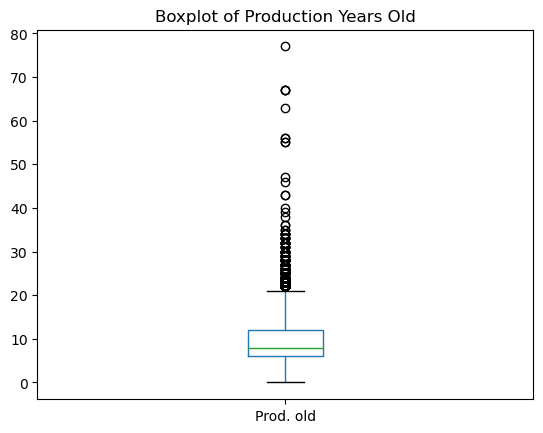

In [38]:
import matplotlib.pyplot as plt
ax = car.boxplot(column='Prod. old', grid=False)

# Step 2: Customize the plot
plt.title('Boxplot of Production Years Old')
plt.show()

This is aligned my my expectations for the age of the cars. There are new cars, but most of the cars in this dataset are 5 to 11 year old used cars. There are some older cars, and these outliers are valid.

To visualize the data differently, I created a histogram.

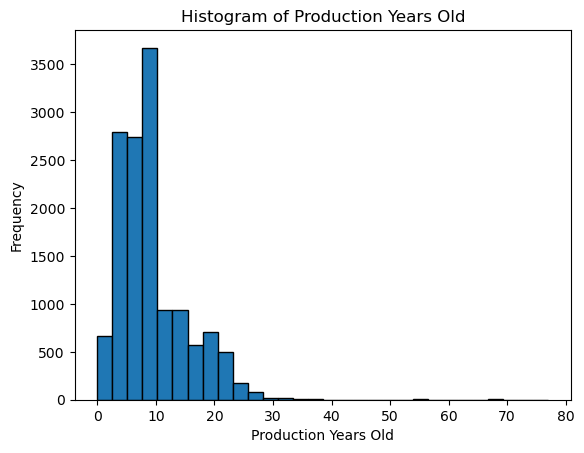

In [39]:
car['Prod. old'].hist(bins=30, edgecolor='black', grid=False) 
plt.title('Histogram of Production Years Old') 
plt.ylabel('Frequency') 
plt.xlabel('Production Years Old')  
plt.show()

This plot aligns with the box plot above. There are new cars, but most of the cars in this dataset are 5 to 11 year old used cars. 

## 4. Summary statistics: Non-Numeric Attributes
I will now describe the high level statistics for each of the non-numeric columns

In [40]:
car.describe(include='object')

,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
count,13842,13842,13842,13842,13842,13842,13842
unique,11,2,7,4,3,2,16
top,Sedan,Yes,Petrol,Automatic,Front,Left wheel,Black
freq,6189,9512,7273,8945,9857,12635,3365


There are no null values present in any of the non-numeric columns. I printed the unique values for each column to confirm they are valid.

In [41]:
#Unique values for Category
print(car['Category'].unique())
#Records associated with Jeep or Goods wagon
print(car[car['Category'].isin(['Jeep', 'Goods wagon'])])

['Jeep' 'Hatchback' 'Microbus' 'Goods wagon' 'Sedan' 'Universal' 'Minivan'
 'Cabriolet' 'Coupe' 'Limousine' 'Pickup']
             ID  Price  Prod. year     Category Leather interior Fuel type  \
0      45654403  13328        2010         Jeep              Yes    Hybrid   
1      44731507  16621        2011         Jeep               No    Petrol   
5      45802912  39493        2016         Jeep              Yes    Diesel   
9      45756839  26657        2007         Jeep              Yes    Petrol   
12     45815568   3000        1997  Goods wagon               No       CNG   
...         ...    ...         ...          ...              ...       ...   
19211  45802856  50037        2016         Jeep              Yes    Diesel   
19216  45784464  37633        2017         Jeep              Yes    Petrol   
19225  45794580   8781        2007  Goods wagon               No    Diesel   
19234  45804997  26108        2010         Jeep              Yes    Diesel   
19235  45793526   5331  

For Category, most of the category are standard. I was unclear on the meaning of Jeep and Goods wagon, so I pulled records for these two categories. Based on the records associated with these categories, Jeep refers to offroad vehicles, and Goods wagon refers to commercial vehicles. All the values for this column are valid.

In [42]:
print(car['Leather interior'].unique())
print(car['Fuel type'].unique())
print(car['Gear box type'].unique())
print(car['Drive wheels'].unique())
print(car['Wheel'].unique())
print(car['Color'].unique())

#print number of records
print(len(car))

['Yes' 'No']
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
['Automatic' 'Tiptronic' 'Variator' 'Manual']
['4x4' 'Front' 'Rear']
['Left wheel' 'Right-hand drive']
['Silver' 'Black' 'White' 'Blue' 'Green' 'Grey' 'Red' 'Sky blue' 'Yellow'
 'Golden' 'Beige' 'Brown' 'Orange' 'Carnelian red' 'Purple' 'Pink']
13842


The values for leather interior are valid.\
The values for fuel type are valid. CNG stands for compressed natural gas. LPG stands for Liquefied Petroleum Gas. Both are rare, but are valid fuel types.\
The values for gearbox type are valid types of car transmissions.\
The values for drive wheels are valid different types of drive wheels.\
The values for wheel are valid different locations of the steering wheel.\
The values for color are valid car colors.\
After analyzing all the features, 13842 records are remaining, which is sufficient for model development. 

## 5. Comparing Attributes Against Price

In [43]:
#ID column is no longer needed
#car = car.drop(['ID'], axis = 1)

### Plot Attributes Against Price (Numeric)
Numeric Features  are compared with price using scatter plots. Non-numeric featured are compared with price using box plots.

<u>Engine Volume<u/>

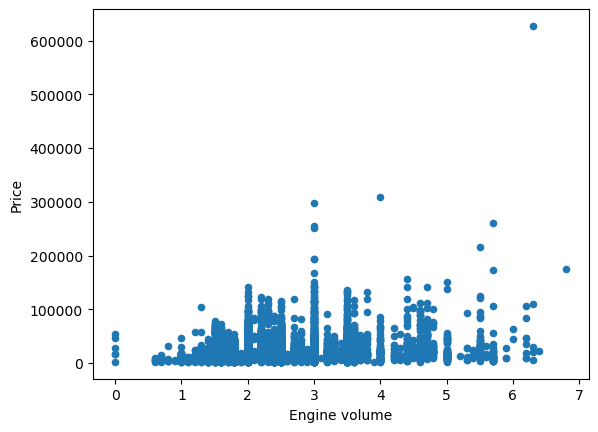

In [44]:
car.plot(kind='scatter', x='Engine volume', y='Price')
plt.show()

There is a slight positive correlation between engine volume and price

<u>Mileage<u/>

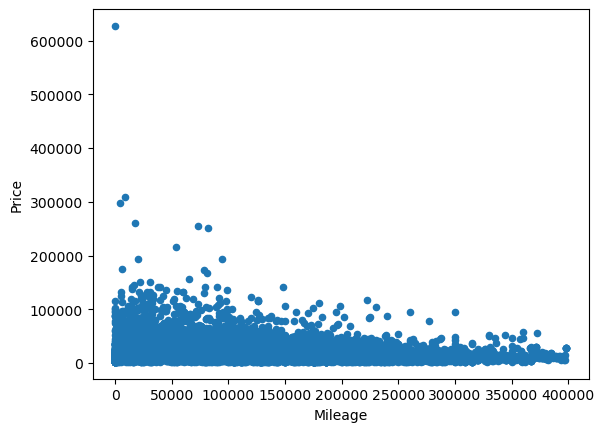

In [45]:
car.plot(kind='scatter', x='Mileage', y='Price')
plt.show()

There is a negative correlation between mileage and price

<u>Cylinders<u/>

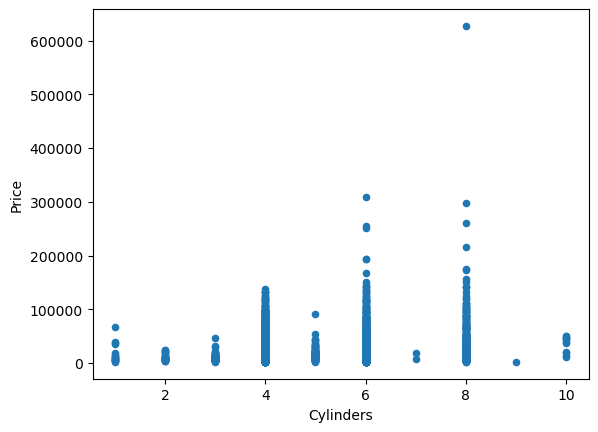

In [46]:
car.plot(kind='scatter', x='Cylinders', y='Price')
plt.show()

There is no clear relationship between cylinders and price.

<u>Airbags<u/>

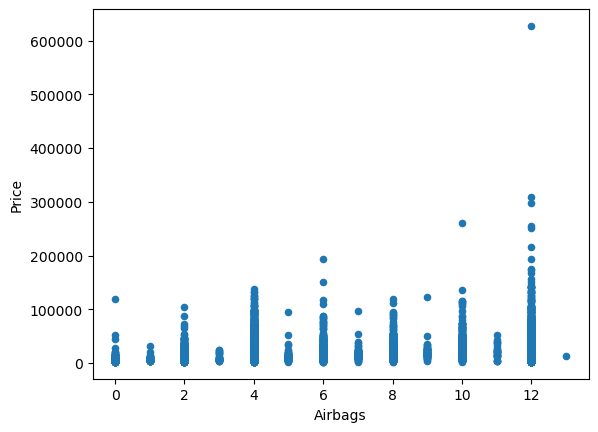

In [47]:
car.plot(kind='scatter', x='Airbags', y='Price')
plt.show()

There is positive relationship between number of airbags and price.

#### Production years old (cars age)

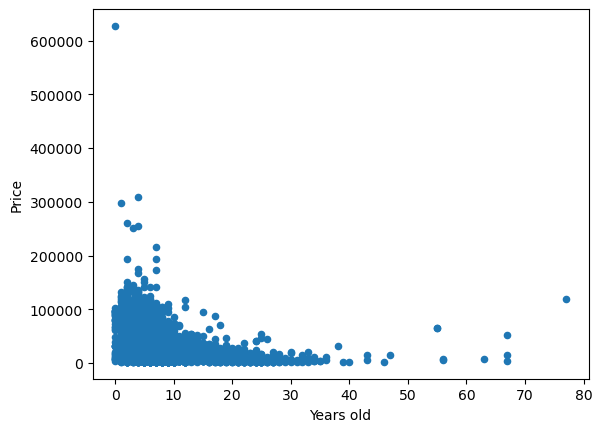

In [48]:
car.plot(kind='scatter', x='Prod. old', y='Price')
plt.xlabel('Years old') 
plt.show()

There is negative relationship between cars age and price. The relationship would be the same with the production year of the car.

### Plot Attributes Against Price (Non-numeric)

<u>Category<u/>

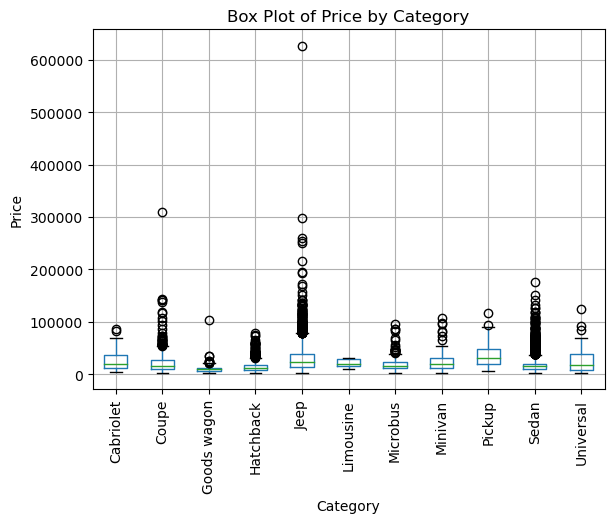

In [49]:
car.boxplot(column='Price', by='Category')
plt.title('Box Plot of Price by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Most of the categories are close in price. Jeep (offroad vehicles) has a greater number of high priced cars.

<u>Leather Interior<u/>

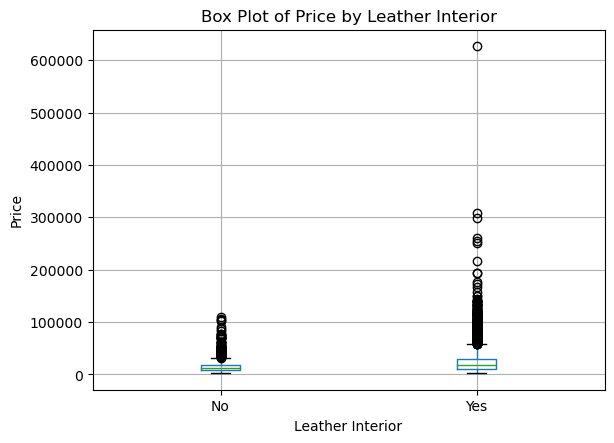

In [50]:
car.boxplot(column='Price', by='Leather interior')
plt.title('Box Plot of Price by Leather Interior')
plt.suptitle('')
plt.xlabel('Leather Interior')
plt.ylabel('Price')
plt.show()

Cars with leather interior tended to be more expensive than cars without leather interior.

<u>Fuel type<u/>

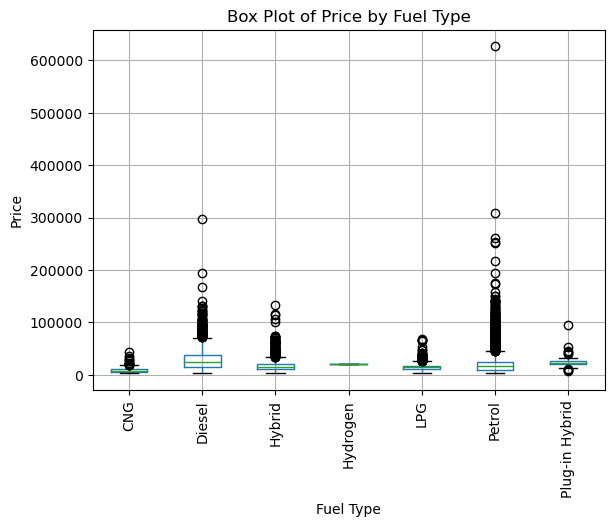

In [51]:
car.boxplot(column='Price', by='Fuel type')
plt.title('Box Plot of Price by Fuel Type')
plt.suptitle('')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Most of the fuel types are close in price. The most expensive cars had diesel or petrol as the fuel type.

<u>Gear Box Type<u/>

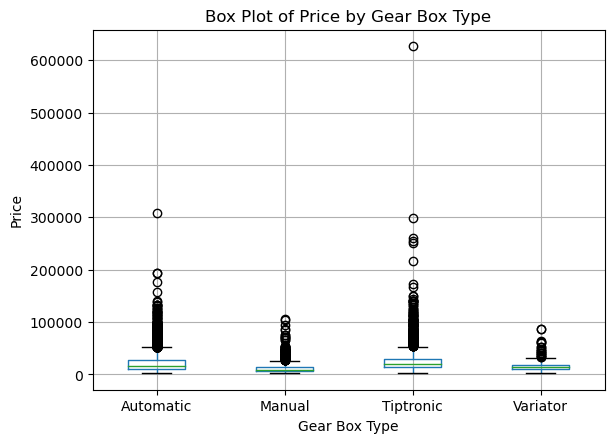

In [52]:
car.boxplot(column='Price', by='Gear box type')
plt.title('Box Plot of Price by Gear Box Type')
plt.suptitle('')
plt.xlabel('Gear Box Type')
plt.ylabel('Price')
plt.show()

 The price distribution is similar regardless of gear box type.

<u>Drive Wheels<u/>

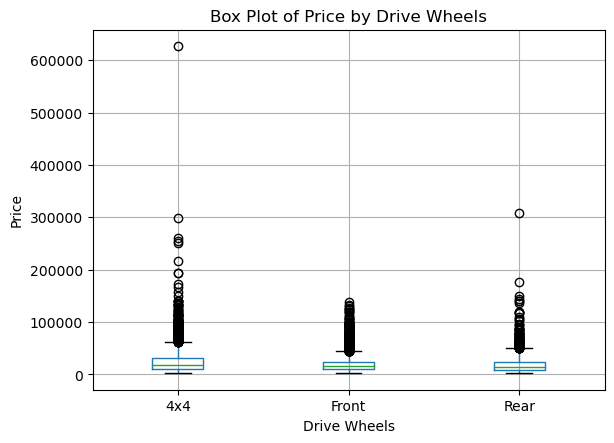

In [53]:
car.boxplot(column='Price', by='Drive wheels')
plt.title('Box Plot of Price by Drive Wheels')
plt.suptitle('')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.show()

The price distribution is similar regardless of drive wheel.

<u>Wheel (Steering Wheel Location)<u/>

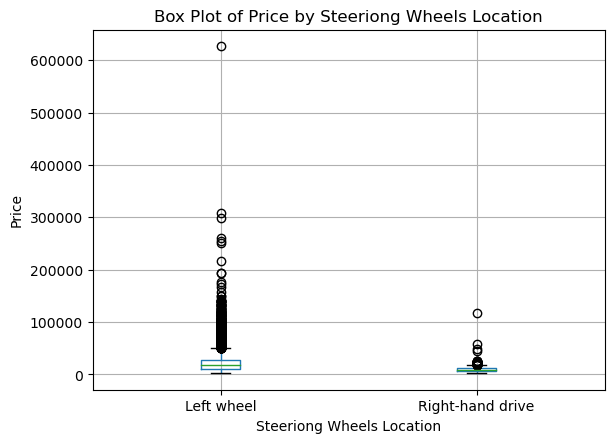

In [54]:
car.boxplot(column='Price', by='Wheel')
plt.title('Box Plot of Price by Steeriong Wheels Location')
plt.suptitle('')
plt.xlabel('Steeriong Wheels Location')
plt.ylabel('Price')
plt.show()

The cars with a steering wheel on the left side tend to have a higher price than cars with a steering wheel on the right side. 

<u>Color<u/>

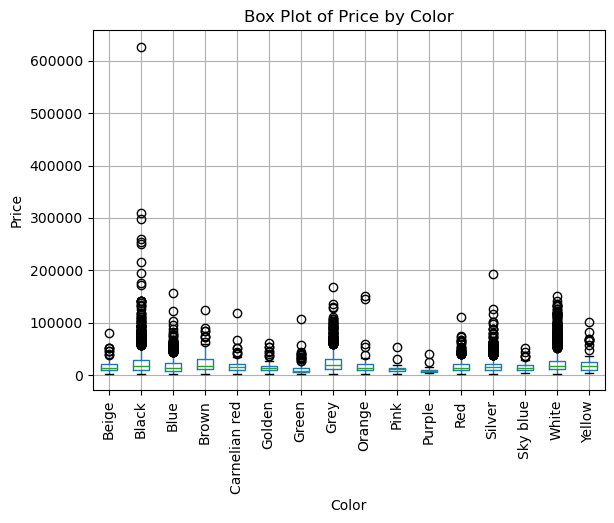

In [55]:
car.boxplot(column='Price', by='Color')
plt.title('Box Plot of Price by Color')
plt.suptitle('')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

The cars prices are similar regardless of color.

## Find the Attributes Most Correlated with Price
Non-numeric features do not work in most statistical models. Thus, they need to be converted into a numeric feature.

To accomplish this, I used one hot encoding, which converts each value in a non-numeric column into a binary feature. I will be performing one hot encoding on all the categorical features.

In [56]:
car = pd.get_dummies(car, columns=['Category', 'Leather interior', 'Fuel type', 'Gear box type',
                                   'Drive wheels', 'Wheel', 'Color'])
#confirm one hot encoding was successful
print(car.head())

         ID  Price  Prod. year  Engine volume  Mileage  Cylinders Doors  \
0  45654403  13328        2010            3.5   186005          6     4   
1  44731507  16621        2011            3.0   192000          6     4   
2  45774419   8467        2006            1.3   200000          4     4   
4  45809263  11726        2014            1.3    91901          4     4   
5  45802912  39493        2016            2.0   160931          4     4   

   Airbags  Turbo  Prod. old  ...  Color_Green  Color_Grey  Color_Orange  \
0       12  False         10  ...            0           0             0   
1        8  False          9  ...            0           0             0   
2        2  False         14  ...            0           0             0   
4        4  False          6  ...            0           0             0   
5        4  False          4  ...            0           0             0   

   Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0           0       

Calculate Correlation between features and price

In [57]:
correlation = car.corr()['Price']
correlation = correlation.sort_values(ascending=False)
print(correlation)

Price                       1.000000
Prod. year                  0.389754
Category_Jeep               0.287495
Leather interior_Yes        0.240062
Engine volume               0.213194
Fuel type_Diesel            0.199550
Wheel_Left wheel            0.179401
Turbo                       0.150961
Gear box type_Tiptronic     0.149642
Cylinders                   0.134810
Drive wheels_4x4            0.123062
Color_Black                 0.070072
Color_Grey                  0.065639
Color_White                 0.048186
Category_Pickup             0.045053
Airbags                     0.043339
Category_Universal          0.024941
Category_Coupe              0.019095
Color_Brown                 0.018861
Category_Cabriolet          0.016931
Fuel type_Plug-in Hybrid    0.013825
Gear box type_Automatic     0.011201
Category_Minivan            0.010976
Color_Yellow                0.004917
Category_Limousine          0.000404
Fuel type_Hydrogen         -0.000123
Category_Microbus          -0.007169
C

/var/folders/lk/yczlh7fd1fj3p25xqwmtk1ph0000gn/T/ipykernel_79942/3896493763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = car.corr()['Price']


To reduce the number of features, I filtered on the values that have at least absolute value of 15% correlation

In [58]:
correlation = car.corr()['Price']
correlation = correlation.sort_values(ascending=False)
correlation = correlation[abs(correlation) >= 0.15]
print(car_raw[car_raw['Category'] == 'Goods wagon'])
print(correlation)

/var/folders/lk/yczlh7fd1fj3p25xqwmtk1ph0000gn/T/ipykernel_79942/2475643775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = car.corr()['Price']


             ID  Price  Levy   Manufacturer            Model  Prod. year  \
12     45815568   3000     -           OPEL           Vectra        1997   
30     44944581  15681  1288  MERCEDES-BENZ             Vito        2007   
149    45777114   3136     -         SUBARU           Legacy        2005   
179    45395938  21950   831           FORD          Transit        2011   
294    45764287   6272  1522           OPEL           Zafira        2000   
...         ...    ...   ...            ...              ...         ...   
18922  45433464   9722  1515           FORD  Transit Connect        2005   
19059  45133300  10500     -           FORD          Transit        1997   
19067  45787854   7213     -           OPEL            Combo        2003   
19094  45804509  11290     -           FORD          Transit        2000   
19225  45794580   8781  1107           OPEL            Combo        2007   

          Category Leather interior Fuel type Engine volume    Mileage  \
12     Goods 

This analysis indicates that the average price of a car tends to increase under the following conditions:

The car is classified as an off-road vehicle (category = Jeep).
The car features a leather interior.\
The car has a higher engine volume.\
The car is equipped with a diesel engine.\
The car has a turbo engine.

Conversely, the average price of a car tends to decrease when the following conditions are present:

The car is a hatchback or sedan.\
The car has a manual gearbox.\
The car has higher mileage.\
The car is older in age.

## Milestone 3
Objective: Identify cars aligned with a person’s preferences that minimize price depreciation.

Metrics of interest: Price, Engine Volume, Cylinders, Production Year of the car, the type of the car (e.g., sedan), the fuel type of the car, whether the car has leather interior.

Models Used: Linear model, Polynomial model, and Gamma model.

Output: Model performance, top 3 features to reduce price depreciation, and the ten best cars for the user's preferences which minimize price depreciation.

After I created my model, I noticed that the categorical features were exhibiting multicollinearity. Specifically, there were categorical values from the same category (e.g., drive wheels) that had the same p-value and coefficient. Based on these results, I checked for multicollinearity between the one-hot-encoded categorical features.

When the multicollinearity was around 0.7 or higher, I removed the one of the correlates feature.

Category_Cabriolet        31
Category_Coupe           455
Category_Goods wagon     191
Category_Hatchback      2045
Category_Jeep           3725
Category_Limousine         6
Category_Microbus        240
Category_Minivan         581
Category_Pickup           33
Category_Sedan          6189
Category_Universal       346
dtype: int64


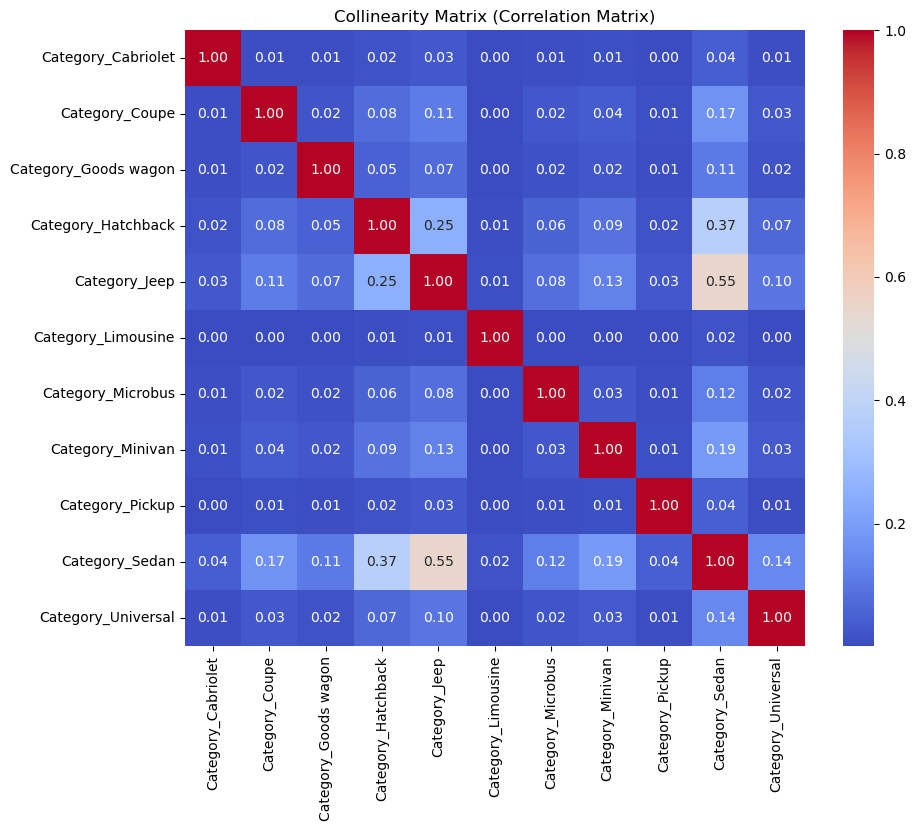

In [59]:
#Check for multicollinearity in car type
import seaborn as sns

selected_features = [
    'Category_Cabriolet',
       'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal'
]
# Filter the DataFrame to only include these features
data = car[selected_features]
# Count the number of features present
count = (data == 1).sum()
print(count)

# Compute the correlation matrix
correlation_matrix = data.corr().abs()

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Collinearity Matrix (Correlation Matrix)")
plt.show()

All the correlation values for car type are moderate or low, so no features need to be removed. However, there are only a small number of cabriolets, pickup trucks, and limousines in the dataset, so they will be excluded from the model selection. This exclusion is handled in the find_important_depreciation_features function.

Drive wheels_Front    9857
Drive wheels_Rear     1755
Drive wheels_4x4      2230
dtype: int64


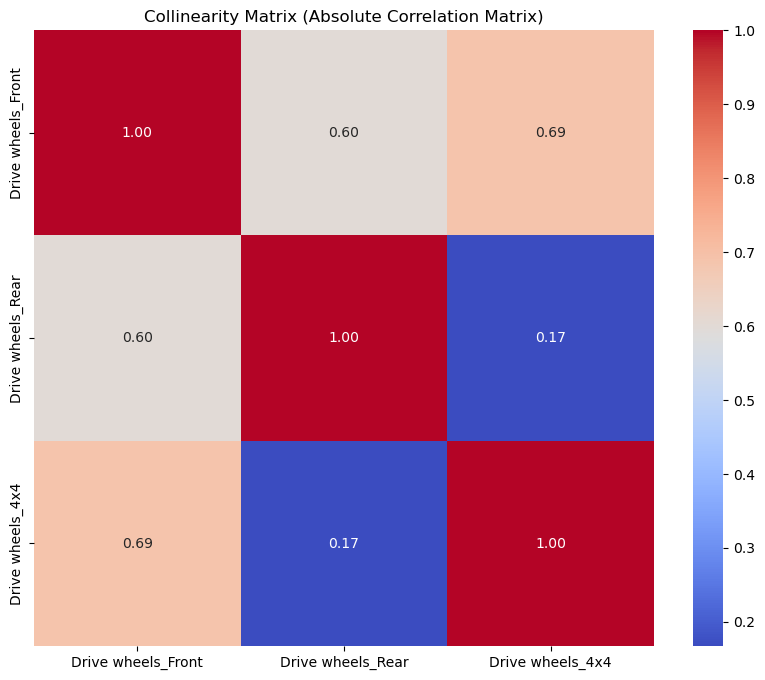

In [60]:
#Check for multicollinearity in drive wheels

# Selected features
selected_features = [
    'Drive wheels_Front', 'Drive wheels_Rear', 'Drive wheels_4x4'
]

# Filter the DataFrame to only include these features
data = car[selected_features]

# Compute the correlation matrix and take absolute values
correlation_matrix = data.corr().abs()

# Count the number of features present
count = (data == 1).sum()
print(count)

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Collinearity Matrix (Absolute Correlation Matrix)")
plt.show()

High multicollinearity is observed between Drive Wheels_Front and Drive Wheels_4x4. As a result, Drive_Wheels 4x4 will be excluded in the find_important_depreciation_features function.

Fuel type_CNG                424
Fuel type_Diesel            3368
Fuel type_Hybrid            2064
Fuel type_Hydrogen             1
Fuel type_LPG                634
Fuel type_Petrol            7273
Fuel type_Plug-in Hybrid      78
dtype: int64


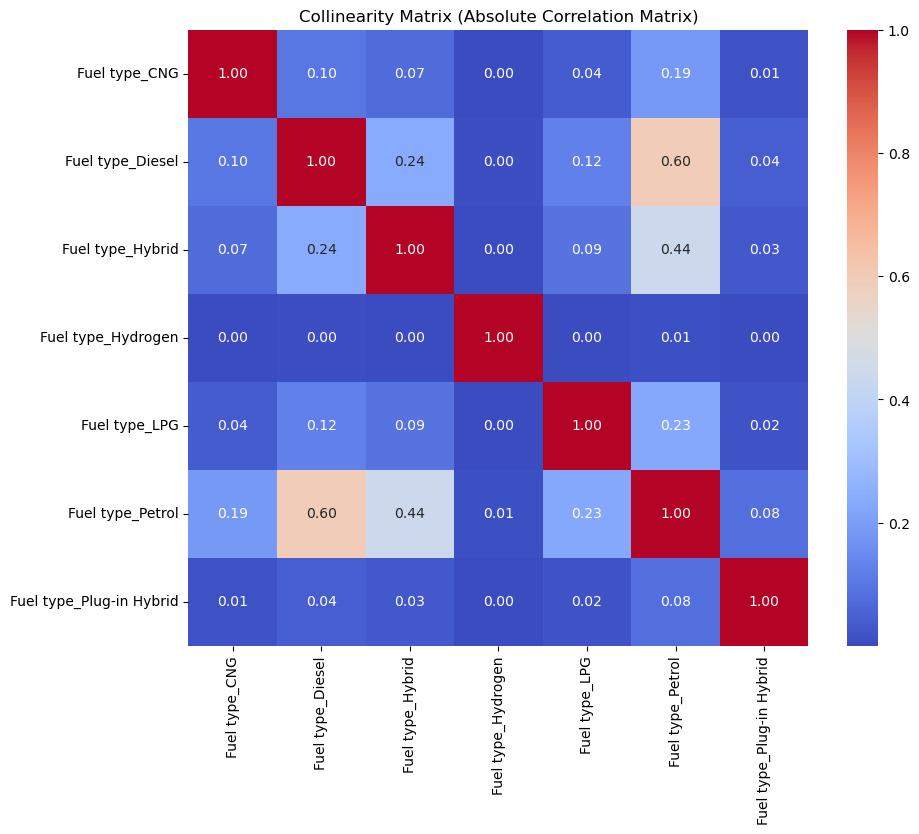

In [61]:
#Check for multicolinarity in fuel type

# Selected features
selected_features = [
    'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid'
]

# Filter the DataFrame to only include these features
data = car[selected_features]
# Count the number of features present
count = (data == 1).sum()
print(count)

#there are less than 100 values for Fuel type_Plug-in Hybrid and Fuel type_LPG, 
#so these values will be excluded from my analysis. I do not have sufficent data for these fuel types


# Compute the correlation matrix and take absolute values
correlation_matrix = data.corr().abs()

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Collinearity Matrix (Absolute Correlation Matrix)")
plt.show()


All the correlation values for car type are moderate or low, so no features need to be removed. However, there are only a small number of cars with a fuel type of Hydrogen or plug in hybrid, so they will be excluded from the model selection. This exclusion is handled in the find_important_depreciation_features function.

In [62]:
#create the new and used cars datasets
car.rename(columns={'Prod. year': 'Model year'}, inplace=True)
car.rename(columns={'Category_Jeep': 'Category_SUV'}, inplace=True)
used_car = car[(car['Mileage'] >= 80000) & (car['Mileage'] <= 130000)]
new_car = car[(car['Mileage'] >= 0) & (car['Mileage'] <= 30000)]

Do you have a preference on Price? (yes/no): yes
What is your lower limit on price? 10000
What is your upper limit on Price? 40000
Do you have a preference on Engine volume? (yes/no): no
Do you have a preference on Cylinders? (yes/no): no
Do you have a preference on Model year? (yes/no): yes
What is your lower limit on the car's model year? 2012
What is your upper limit on Model year? 2024
Do you have a preference for car type(s)? (yes/no): yes
Would you be potentially interested in a sedan? (yes/no): yes
Would you be potentially interested in a SUV? (yes/no): yes
Would you be potentially interested in a hatchback? (yes/no): yes
Would you be potentially interested in a coupe? (yes/no): yes
Would you be potentially interested in a van? (yes/no): no
Would you be potentially interested in a microbus? (yes/no): no
Would you be potentially interested in a minivan? (yes/no): no
Would you be potentially interested in a station wagon? (yes/no): yes
Do you have a preference for fuel type? (yes/

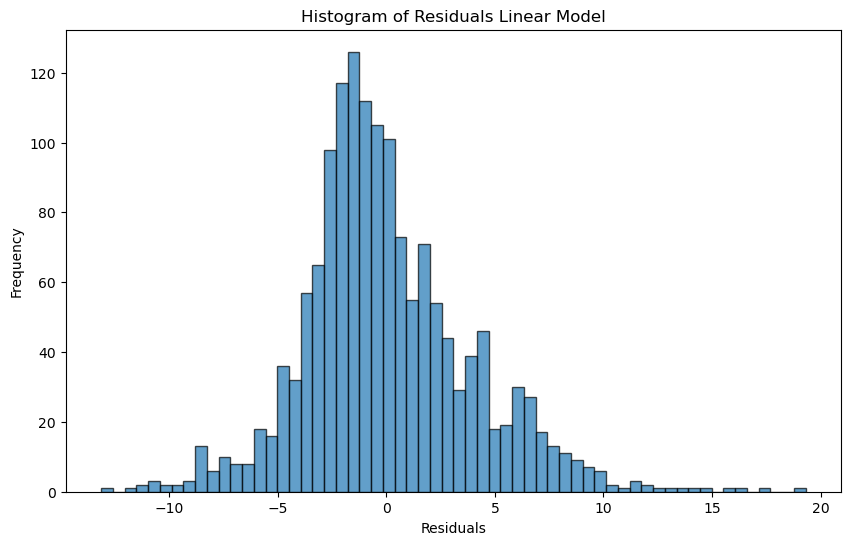

Linear MAE: 2.93627720879921


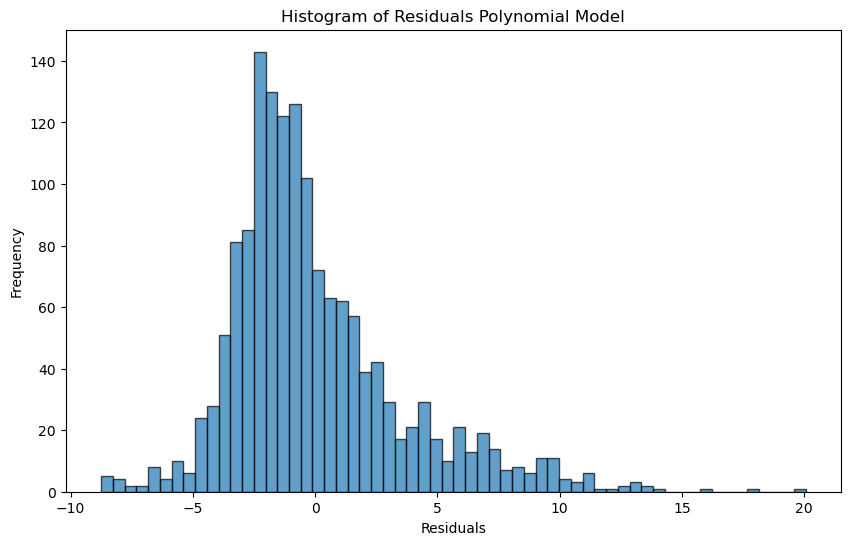

Poly MAE: 2.6658925763545325


/Users/eddiemcgowan/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


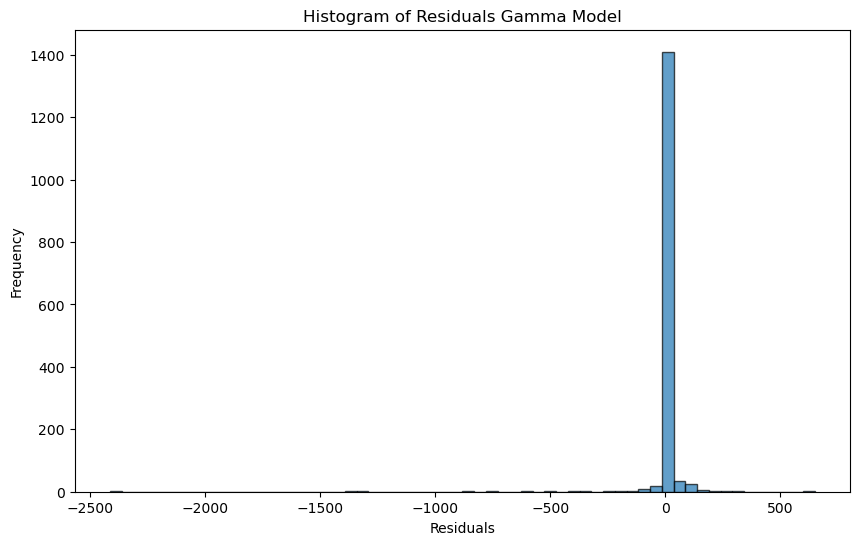

Gamma MAE: 19.383350636309142

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1   group2   meandiff p-adj lower  upper reject
----------------------------------------------------
 Gamma     Linear     -0.0   1.0 -4.788 4.788  False
 Gamma Polynomial      0.0   1.0 -4.788 4.788  False
Linear Polynomial      0.0   1.0 -4.788 4.788  False
----------------------------------------------------
Linear vs Polynomial: t-statistic = -5.931877891584831e-08, p-value = 0.9999999526743388
Linear vs Gamma: t-statistic = -2.0351115875323083e-11, p-value = 0.9999999999837634
Polynomial vs Gamma: t-statistic = 3.194785463613351e-09, p-value = 0.9999999974511389

 Best model selected: Polynomial

 Top 3 important features for the best model: ['Cylinders^2', 'Price', 'Price^2']

 Using the Polynomial model 10 Recommended Cars with Low Depreciation:
                               OLS Regression Results                              
Dep. Variable:     Depreciation_Percentage 

/var/folders/lk/yczlh7fd1fj3p25xqwmtk1ph0000gn/T/ipykernel_79942/736346612.py:232: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_car2.fillna(new_car2.mean(), inplace=True)


In [66]:
# Model with linear regression, polynomial regression, and gamma.
# picking the model with the highest r squared value
# printing the most signgnificant features in the best model
# recommending 10 cars using the best model
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind


def find_important_depreciation_features(confidence_interval=0.05):
    # Filter for the users preferences with propts
    continuous_features = {
        'Price': "What is your lower limit on price?",
        'Engine volume': "What is your lower limit on engine volume?",
        'Cylinders': "What is your lower limit on cylinders?",
        'Model year': "What is your lower limit on the car's model year?"
    }

    binary_feature_groups = {
        'Car Type': {
            'question': "Do you have a preference for car type(s)?",
            'features': {
                'Category_Sedan': "Would you be potentially interested in a sedan?",
                'Category_SUV': "Would you be potentially interested in a SUV?",
                'Category_Hatchback': "Would you be potentially interested in a hatchback?",
                'Category_Coupe': "Would you be potentially interested in a coupe?",
                'Category_Goods wagon': "Would you be potentially interested in a van?",
                'Category_Microbus': "Would you be potentially interested in a microbus?",
                'Category_Minivan': "Would you be potentially interested in a minivan?",
                'Category_Universal': "Would you be potentially interested in a station wagon?"
            }
        },
        'Fuel Type': {
            'question': "Do you have a preference for fuel type?",
            'features': {
                'Fuel type_CNG': "Would you be potentially interested in cars with CNG fuel?",
                'Fuel type_Diesel': "Would you be potentially interested in cars with diesel fuel?",
                'Fuel type_Hybrid': "Would you be potentially interested in hybrid car?",
                'Fuel type_LPG': "Would you be potentially interested in cars with LPG fuel?",
                'Fuel type_Petrol': "Would you be potentially interested in cars with petrol fuel?"
            }
        },
        'Leather Interior': {
            'question': "Do you have a preference for having a leather interior?",
            'features': {
                'Leather interior_Yes': "Would you be potentially interested in cars with leather interior?"
            }
        },
        'Drive Wheels': {
            'question': "Do you have a preference for the number and location of the drive wheels?",
            'features': {
                'Drive wheels_Front': "Would you be potentially interested in cars with ront drive wheels?",
                'Drive wheels_Rear': "Would you be potentially interested in cars with Rear drive wheels?"
            }
        }
    }

    # Lists to store selected features
    selected_continuous_features = {}
    selected_binary_features = []
    non_selected_binary_features = []

    # Handle continuous features with range limits
    for feature, prompt in continuous_features.items():
        if input(f"Do you have a preference on {feature}? (yes/no): ").strip().lower() == "yes":
            lower_limit = float(input(f"{prompt} "))
            upper_limit = float(input(f"What is your upper limit on {feature}? "))
            selected_continuous_features[feature] = (lower_limit, upper_limit)
        else:
            selected_continuous_features[feature] = None

    # Handle binary feature groups with initial question and follow-ups
    for group_name, group_data in binary_feature_groups.items():
        if input(f"{group_data['question']} (yes/no): ").strip().lower() == "yes":
            for feature, prompt in group_data['features'].items():
                if input(f"{prompt} (yes/no): ").strip().lower() == "yes":
                    selected_binary_features.append(feature)
                    if group_name == 'Leather Interior':
                        non_selected_binary_features.append('Leather interior_No')
                else:
                    non_selected_binary_features.append(feature)
                    if group_name == 'Leather Interior':
                        selected_binary_features.append('Leather interior_No')

        else:
            selected_binary_features.extend(group_data['features'].keys())

    # Exclude 'Drive wheels_4x4' as the baseline if it's in the selected binary features. This fixes an issue with multicollinearity
    selected_binary_features = [f for f in selected_binary_features if f != 'Drive wheels_4x4']
    
    # Copy the data to avoid modifying original DataFrames
    new_car2 = new_car.copy()
    used_car2 = used_car.copy()

    # Apply filters based on continuous feature limits
    for feature, limits in selected_continuous_features.items():
        if limits is not None:
            lower, upper = limits
            used_car2 = used_car2[(used_car2[feature] >= lower) & (used_car2[feature] <= upper)]
            new_car2 = new_car2[(new_car2[feature] >= lower) & (new_car2[feature] <= upper)]
    for feature in non_selected_binary_features:
        if feature in used_car2.columns:
            used_car2 = used_car2[used_car2[feature] == 0]
        if feature in new_car2.columns:
            new_car2 = new_car2[new_car2[feature] == 0]

    # Dictionary to store average prices for each continuous variable
    avg_price_dict = {}

    # Calculate average prices for each continuous variable in `new_car`
    for col in selected_continuous_features.keys():
        new_car2[col] = new_car2[col].round()  # Round for consistency
        avg_price_dict[col] = new_car2.groupby(col)['Price'].mean().rename(f'AvgPrice_New_{col}')

    # Merge each average price column into `used_car2`
    for col in selected_continuous_features.keys():
        used_car2 = used_car2.merge(avg_price_dict[col], on=col, how='left')
        used_car2[f'AvgPrice_New_{col}'] = used_car2[f'AvgPrice_New_{col}'].fillna(new_car2['Price'].mean())

    # Calculate depreciation percentage for each car
    used_car2['Depreciation_Percentage'] = (
        (used_car2.filter(like='AvgPrice_New').values - used_car2['Price'].values[:, None]) 
        / used_car2.filter(like='AvgPrice_New').values
    ).mean(axis=1) * 100
    used_car2 = used_car2.dropna(subset=['Depreciation_Percentage'])

    # Define features (X) and target (y)
    all_columns = list(selected_continuous_features.keys()) + selected_binary_features
    X = used_car2[all_columns]
    y = used_car2['Depreciation_Percentage']

    # Add a constant for the intercept
    X = sm.add_constant(X)

    # Fit the linear regression model
    linear_model = sm.OLS(y, X).fit()
    linear_predictions = linear_model.predict(X)
    # Calculate residuals
    linear_residuals = y - linear_predictions
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.hist(linear_residuals, bins=60, edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals Linear Model")
    plt.show()
    linear_mae = mean_absolute_error(y, linear_predictions)
    print("Linear MAE:", linear_mae)
    

    # Polynomial regression
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(used_car2[list(selected_continuous_features.keys())])
    X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(list(selected_continuous_features.keys())))
    X_poly_combined = pd.concat([X_poly_df, used_car2[selected_binary_features]], axis=1)
    X_poly_combined = sm.add_constant(X_poly_combined)
    poly_model = sm.OLS(y, X_poly_combined).fit()
    poly_predictions = poly_model.predict(X_poly_combined)
    # Calculate residuals
    poly_residuals = y - poly_predictions
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.hist(poly_residuals, bins=60, edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals Polynomial Model")
    plt.show()
    poly_mae = mean_absolute_error(y, poly_predictions)
    print("Poly MAE:", poly_mae)
    
    # Gamma regression
    # Identify columns with NaN or infinite values in new_car2
    y = y.clip(lower=1e-6)

    gamma_model = sm.GLM(y, X, family=sm.families.Gamma()).fit()
    z_scores = gamma_model.summary2().tables[1]['z']
    gamma_predictions = gamma_model.predict(X)
    # Calculate residuals
    gamma_residuals = y - gamma_predictions
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.hist(gamma_residuals, bins=60, edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals Gamma Model")
    plt.show()
    gamma_mae = mean_absolute_error(y, gamma_predictions)
    print("Gamma MAE:", gamma_mae)

    data = pd.DataFrame({
        'Residuals': np.concatenate((linear_residuals, poly_residuals, gamma_residuals)),
        'Model': (['Linear'] * len(linear_residuals) + 
                  ['Polynomial'] * len(poly_residuals) + 
                  ['Gamma'] * len(gamma_residuals))
    })

    # Conduct Tukey's HSD ANOVA for pairwise comparisons
    tukey_results = pairwise_tukeyhsd(endog=data['Residuals'], groups=data['Model'], alpha=0.05)

    print("\nTukey's HSD Results:")
    print(tukey_results)
    
    # Linear vs polynomial
    t_stat, p_val = ttest_ind(linear_residuals, poly_residuals)
    print(f"Linear vs Polynomial: t-statistic = {t_stat}, p-value = {p_val}")

    # Linear vs Gamma
    t_stat, p_val = ttest_ind(linear_residuals, gamma_residuals)
    print(f"Linear vs Gamma: t-statistic = {t_stat}, p-value = {p_val}")

    # Polynomial vs Gamma
    t_stat, p_val = ttest_ind(poly_residuals, gamma_residuals)
    print(f"Polynomial vs Gamma: t-statistic = {t_stat}, p-value = {p_val}")

    # Calculate p-values for each z-score
    p_values = 2 * norm.sf(abs(z_scores))  # two-tailed test

    # Display the z-scores with their corresponding p-values
    gamma_summary = gamma_model.summary2().tables[1]
    gamma_summary['P-value'] = p_values
    
    # Handle NaN and inf values. These are caused by edge cases where a match cannot be found between a used and new car
    new_car2.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_car2.fillna(new_car2.mean(), inplace=True)

    # Predict depreciation using all models for new cars
    #add predictions for linear model
    X_pred = sm.add_constant(new_car2[all_columns])
    new_car2['Predicted_Depreciation_Linear'] = linear_model.predict(X_pred)

    #add predictions gamma model
    X_pred_poly = poly.transform(new_car2[list(selected_continuous_features.keys())])
    X_pred_poly_df = pd.DataFrame(X_pred_poly, columns=poly.get_feature_names_out(list(selected_continuous_features.keys())))
    X_pred_poly_combined = pd.concat([X_pred_poly_df, new_car2[selected_binary_features]], axis=1)
    X_pred_poly_combined = sm.add_constant(X_pred_poly_combined)
    new_car2['Predicted_Depreciation_Poly'] = poly_model.predict(X_pred_poly_combined)
    
    #add predictions gamma model
    new_car2['Predicted_Depreciation_Gamma'] = gamma_model.predict(X_pred)

    # Recommend cars with the lowest predicted depreciation
    if linear_mae <= poly_mae and linear_mae <= gamma_mae:
        fit_model = linear_model
        best_model = sm.OLS
        model_name = "Linear"
        X_best = X
        recommended_cars = new_car2.sort_values(by='Predicted_Depreciation_Lineat').head(10)[['ID', 'Predicted_Depreciation_Linear', 'Predicted_Depreciation_Poly', 'Predicted_Depreciation_Gamma']]
        recommended_cars_final = pd.merge(car_raw, recommended_cars, on='ID', how='inner').sort_values(by='Predicted_Depreciation_Poly')
    elif poly_mae < linear_mae and poly_mae < gamma_mae:
        fit_model = poly_model
        best_model = sm.OLS
        X_best = X_poly_combined
        model_name = "Polynomial"
        recommended_cars = new_car2.sort_values(by='Predicted_Depreciation_Poly').head(10)[['ID', 'Predicted_Depreciation_Linear', 'Predicted_Depreciation_Poly', 'Predicted_Depreciation_Gamma']]
        recommended_cars_final = pd.merge(car_raw, recommended_cars, on='ID', how='inner').sort_values(by='Predicted_Depreciation_Poly')
    else:
        fit_model = gamma_model
        best_model = sm.GLM
        X_best = X
        model_name = "Gamma"
        recommended_cars = new_car2.sort_values(by='Predicted_Depreciation_Gamma').head(10)[['ID', 'Predicted_Depreciation_Linear', 'Predicted_Depreciation_Poly', 'Predicted_Depreciation_Gamma']]
        recommended_cars_final = pd.merge(car_raw, recommended_cars, on='ID', how='inner').sort_values(by='Predicted_Depreciation_Poly')
    print("\n Best model selected:", model_name)
    # Select features with p-values below the confidence interval and negative coefficients (excluding the intercept)

    # Number of features to keep
    n_features_to_select = 3
    
    # The scaler account for the difference in size of the features. For example price has a much wider range thenthe numebr of cylinders
    scaler = StandardScaler()
    # Fit the scaler and transform the features
    X_scaled = scaler.fit_transform(X_best)
    # Convert the scaled array back to a DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_best.columns)
    # Start with all features
    remaining_features = X_best.columns[(fit_model.pvalues < confidence_interval) & (fit_model.params < 0)].difference(['const'])
    
    while len(remaining_features) > n_features_to_select:
        # Fit the model with current features
        if best_model == 'gamma_model':
            model = best_model(y, X_scaled_df[remaining_features], family=sm.families.Gamma()).fit()
        else:
            model = best_model(y, X_scaled_df[remaining_features]).fit()
        # Get absolute values of coefficients for feature ranking
        coef_abs = model.params.abs()

        # Identify feature with the smallest coefficient
        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmin.html
        least_important_feature = coef_abs.drop('const').idxmin() if 'const' in coef_abs else coef_abs.idxmin()
        # Remove this feature
        remaining_features = list(remaining_features)
        remaining_features.remove(least_important_feature)
    print("\n Top 3 important features for the best model:", remaining_features)
    return linear_model.summary(alpha=confidence_interval), poly_model.summary(alpha=confidence_interval), gamma_model.summary(alpha=confidence_interval), recommended_cars_final, model_name

# Example usage:
linear_summary, poly_summary, gamma_summary, recommended_cars, model_name = find_important_depreciation_features()
print("\n Using the", model_name, "model 10 Recommended Cars with Low Depreciation:")
print(linear_summary)